## TFC 2022/2023

Importação de Bibliotecas

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Carregar o Dataset

In [4]:
df = pd.read_excel('data/Dados_2012-2023.xlsx')

## Mesma DataFrame, mas sem os dados de 2020 e 2021

#
df_sem_2020 = df[df['Ano'] != 2020]
#

df_sem_2020e2021 = df_sem_2020[df_sem_2020['Ano'] != 2021]

model_LR = LinearRegression()

In [4]:
df.head(5)

,Dia Semana,Dia,Mês,Ano,Data,Nº de Chamadas
0,Domingo,1,1,2012,2012-01-01,4538
1,Segunda-feira,2,1,2012,2012-01-02,3263
2,Terça-feira,3,1,2012,2012-01-03,3126
3,Quarta-feira,4,1,2012,2012-01-04,3199
4,Quinta-feira,5,1,2012,2012-01-05,2999


In [5]:
## Iniciação das variaveis dos meses

janeiro_comCOVID = df[((df['Mês'] == 1))]
fevereiro_comCOVID = df[((df['Mês'] == 2))]
marco_comCOVID = df[((df['Mês'] == 3))]
abril_comCOVID = df[((df['Mês'] == 4))]
maio_comCOVID = df[((df['Mês'] == 5))]
junho_comCOVID = df[((df['Mês'] == 6))]
julho_comCOVID = df[((df['Mês'] == 7))]
agosto_comCOVID = df[((df['Mês'] == 8))]
setembro_comCOVID = df[((df['Mês'] == 9))]
outubro_comCOVID = df[((df['Mês'] == 10))]
novembro_comCOVID = df[((df['Mês'] == 11))]
dezembro_comCOVID = df[((df['Mês'] == 12))]

janeiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 1))]
fevereiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 2))]
marco_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 3))]
abril_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 4))]
maio_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 5))]
junho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 6))]
julho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 7))]
agosto_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 8))]
setembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 9))]
outubro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 10))]
novembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 11))]
dezembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 12))]

### Número de Chamadas por ano

In [6]:
# Sem contar com os anos 2020 e 2021
calls_by_year = df_sem_2020e2021.groupby('Ano')['Nº de Chamadas'].sum()
calls_by_year_df = pd.DataFrame(calls_by_year)
calls_by_year_df = calls_by_year_df.reset_index()
calls_by_year_df

,Ano,Nº de Chamadas
0,2012,1150504
1,2013,1199608
2,2014,1260195
3,2015,1304750
4,2016,1372526
5,2017,1365850
6,2018,1393833
7,2019,1415096
8,2022,1527380
9,2023,1378307


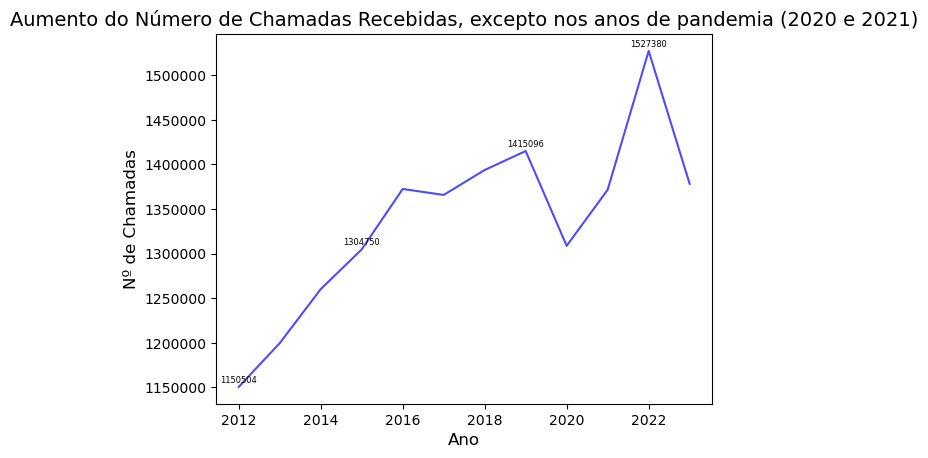

In [7]:
fig, ax = plt.subplots()
calls_by_year = df.groupby('Ano')['Nº de Chamadas'].sum()

data = pd.DataFrame({'Ano': calls_by_year.index, 'Nº de Chamadas': calls_by_year.values})

# ajustar um modelo de regressão linear
model_LR.fit(data[['Ano']], data['Nº de Chamadas'])
ax.plot(data['Ano'], data['Nº de Chamadas'], color='blue', alpha=.7)

ax.set_title('Aumento do Número de Chamadas Recebidas, excepto nos anos de pandemia (2020 e 2021)', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Nº de Chamadas', fontsize=12)

# remover a notação científica do eixo y
ax.ticklabel_format(style='plain', axis='y')

# adicionar rótulos com os valores de chamadas em anos selecionados
for x, y in zip(data['Ano'], data['Nº de Chamadas']):
    if x in [2012, 2015, 2019, 2022]:
        label = "{:.0f}".format(y)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=6)

fig.savefig('Img/Aumento de Chamadas Recebidas.png')
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano (Sem 2020 e 2021)

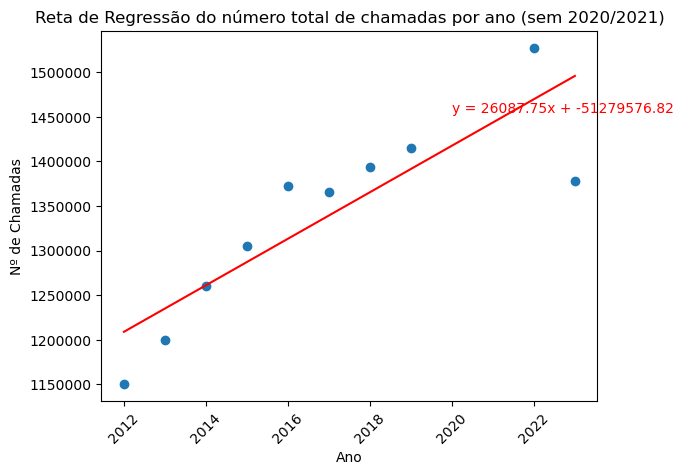

In [8]:
df_grouped = df_sem_2020e2021.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

anos = np.array(df_grouped['Ano']).reshape((-1, 1))
chamadas = np.array(df_grouped['Nº de Chamadas'])

# Treinar o modelo nos dados
model_LR.fit(anos, chamadas)
previsao = model_LR.predict(anos)

# calcular a equação da reta de regressão e adicioná-la no gráfico
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equacao_reta, xy=(2020, 1455000), fontsize=10, color='red')

# remover a notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

# Desenhar gráfico
plt.scatter(anos, chamadas)
plt.plot(anos, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Nº de Chamadas')
plt.title('Reta de Regressão do número total de chamadas por ano (sem 2020/2021)')
plt.xticks(rotation=45)
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano

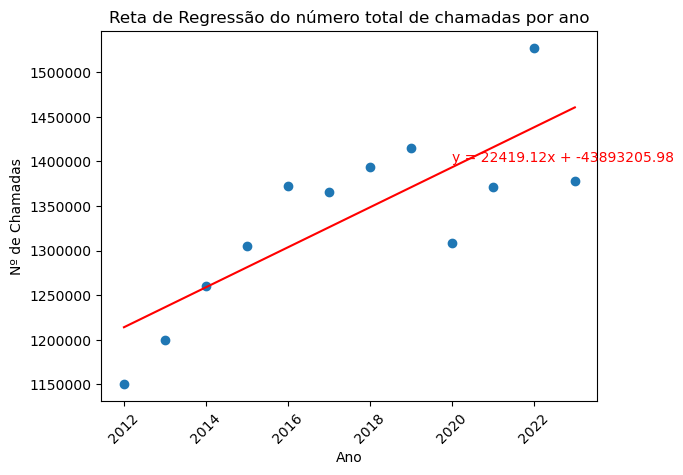

In [9]:
df_grouped = df.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

anos = np.array(df_grouped['Ano']).reshape((-1, 1))
chamadas = np.array(df_grouped['Nº de Chamadas'])

# Treinar o modelo nos dados
model_LR.fit(anos, chamadas)
previsao = model_LR.predict(anos)

# calcular a equação da reta de regressão
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"

# adicionar a equação da reta na linha de regressão
plt.annotate(equacao_reta, xy=(2020, 1400000), fontsize=10, color='red')

# remover a notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

# Plotar os dados e a linha de regressão
plt.scatter(anos, chamadas)
plt.plot(anos, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Nº de Chamadas')
plt.title('Reta de Regressão do número total de chamadas por ano')
plt.xticks(rotation=45)
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano, por mês (Sem 2020 e 2021)

In [10]:
#Numero de chamadas por ano para cada mes (Sem contar com 2020 e 2021)
def numeroChaPorAno_Mes_comCOVID(mes):

    df_mes = df[df['Mês'] == mes]
    df_mes = df_mes.groupby('Ano')['Nº de Chamadas'].sum().reset_index()
    return df_mes

#Numero de chamadas por ano para cada mes (Sem contar com 2020 e 2021)
def numeroChaPorAno_Mes_semCOVID(mes):

    df_mes = df_sem_2020e2021[df_sem_2020e2021['Mês'] == mes]
    df_mes = df_mes.groupby('Ano')['Nº de Chamadas'].sum().reset_index()
    return df_mes

### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro

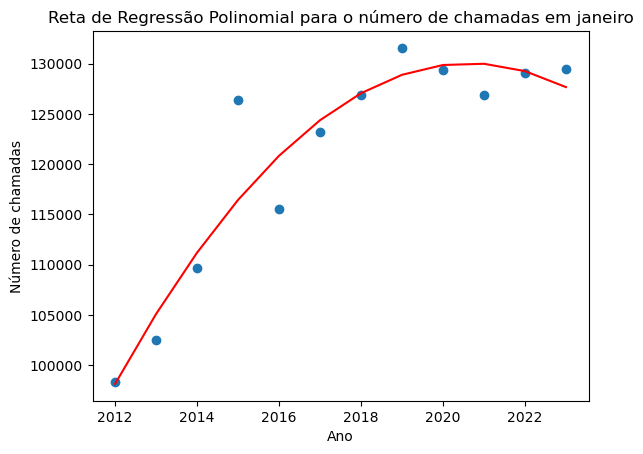

In [11]:
df_jan_comCOVID = numeroChaPorAno_Mes_comCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])
y = np.array(df_jan_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em janeiro')
plt.savefig('Img/Reta de Regressão Polinomial de janeiro.png')
plt.show()

In [12]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

127676.0604403019


In [13]:
# Calculando r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8897242729504768


### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro (sem 2020/2021)

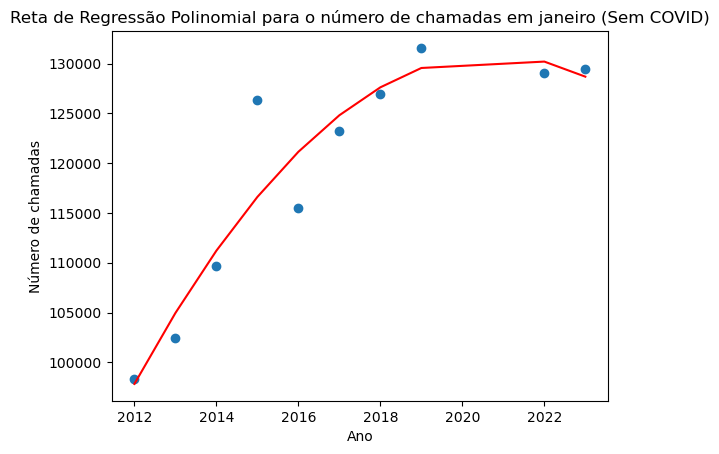

In [14]:
df_jan_semCOVID = numeroChaPorAno_Mes_semCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022,2023])
y = np.array(df_jan_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em janeiro (Sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de janeiro (Sem COVID).png')
plt.show()

In [15]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

128689.62979149818


In [16]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8884014315256644


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro

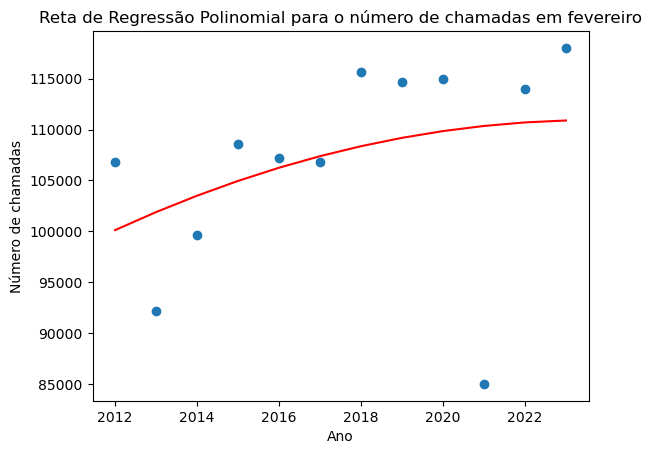

In [17]:
df_fev_comCOVID = numeroChaPorAno_Mes_comCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])
y = np.array(df_fev_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em fevereiro')
plt.savefig('Img/Reta de Regressão Polinomial de fevereiro.png')
plt.show()

In [18]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

110896.75000035763


In [19]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.12900452961331743


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro (sem 2020/2021)

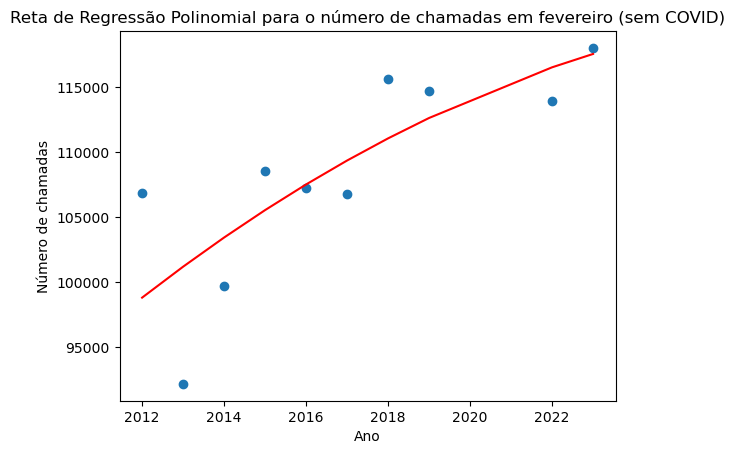

In [20]:
df_fev_semCOVID = numeroChaPorAno_Mes_semCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022,2023])
y = np.array(df_fev_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em fevereiro (sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de fevereiro (Sem COVID).png')
plt.show()

In [21]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

117561.17235773802


In [22]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.6299506311082268


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março

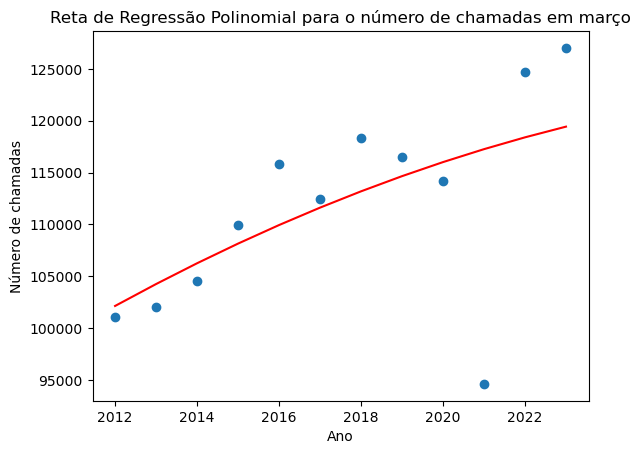

In [23]:
df_mar_comCOVID = numeroChaPorAno_Mes_comCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])
y = np.array(df_mar_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em março')
plt.savefig('Img/Reta de Regressão Polinomial de março.png')
plt.show()

In [24]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

119424.2664834261


In [25]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.340545765333101


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março (sem 2020/2021)

In [26]:
df_mar_semCOVID = numeroChaPorAno_Mes_semCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_mar_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em março (sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de março (Sem COVID).png')
plt.show()

TypeError: expected x and y to have same length

In [ ]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

In [ ]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

### Número total de chamadas recebidas por mês de 2012 a 2022

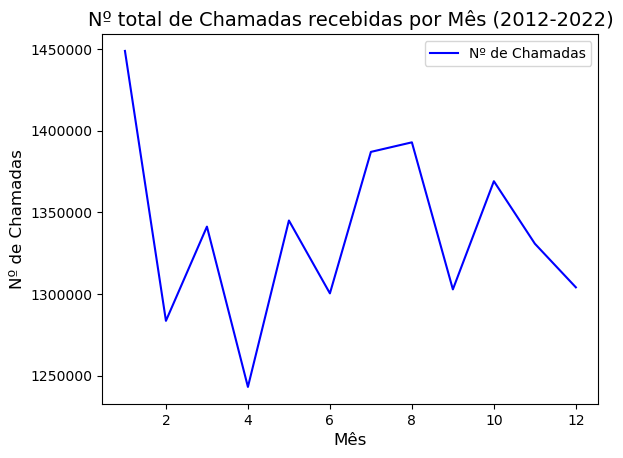

In [27]:
fig, ax = plt.subplots()

calls_by_month = df.groupby('Mês')['Nº de Chamadas'].sum()

ax = calls_by_month.plot(color='blue')

plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend()

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

### Número médio de chamadas recebidas

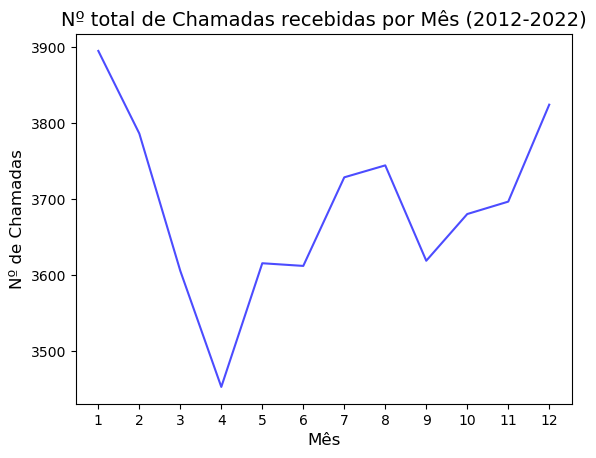

In [28]:
fig, ax = plt.subplots()
calls_by_year = df.groupby('Mês')['Nº de Chamadas'].mean()
meses = range(1, 13)

data = pd.DataFrame({'Mês': calls_by_year.index, 'Nº de Chamadas': calls_by_year.values})

model_LR.fit(data[['Mês']], data['Nº de Chamadas'])

ax.plot(data['Mês'], data['Nº de Chamadas'], color='blue', alpha=.7)

plt.xticks(range(1, 13), meses)
plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)

# Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

### Numero de chamadas recebidas por mês, todos os anos

In [29]:
#Função para determinar o numero de chamadas recebidas por dia

def numeroChaPorDia(mes, ano):
    meses = {
        1: janeiro_comCOVID,
        2: fevereiro_comCOVID,
        3: marco_comCOVID,
        4: abril_comCOVID,
        5: maio_comCOVID,
        6: junho_comCOVID,
        7: julho_comCOVID,
        8: agosto_comCOVID,
        9: setembro_comCOVID,
        10: outubro_comCOVID,
        11: novembro_comCOVID,
        12: dezembro_comCOVID
    }

    if mes in meses:
        mes_escolhido = meses[mes][meses[mes]['Ano'] == ano]
        return mes_escolhido
    else:
        return "Erro, mês não reconhecido"


Numero de chamadas por dia Janeiro

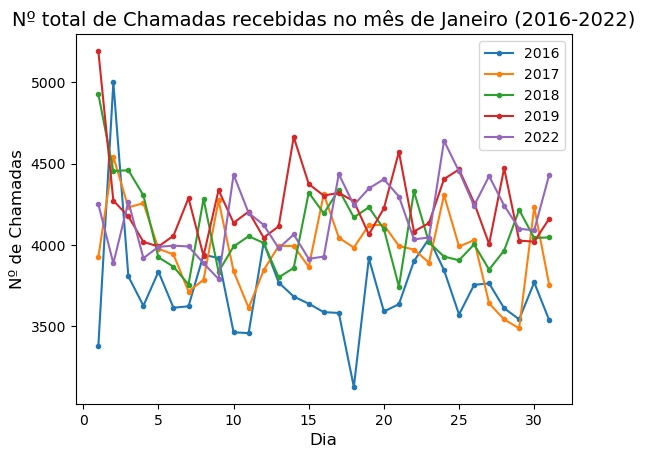

In [30]:
fig, ax = plt.subplots()

jan2016 = numeroChaPorDia(1,2016)
jan2017 = numeroChaPorDia(1,2017)
jan2018 = numeroChaPorDia(1,2018)
jan2019 = numeroChaPorDia(1,2019)
jan2022 = numeroChaPorDia(1,2022)

plt.plot(jan2016['Dia'], jan2016['Nº de Chamadas'], '.-')
plt.plot(jan2017['Dia'], jan2017['Nº de Chamadas'], '.-')
plt.plot(jan2018['Dia'], jan2018['Nº de Chamadas'], '.-')
plt.plot(jan2019['Dia'], jan2019['Nº de Chamadas'], '.-')
plt.plot(jan2022['Dia'], jan2022['Nº de Chamadas'], '.-')

plt.title('Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)', fontsize=14)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend(['2016', '2017', '2018', '2019', '2022'])

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)')
plt.show()

In [31]:
#Numero de chamadas por mes para cada ano
def numeroChaPorMes(ano):

    df_ano = df[df['Ano'] == ano]
    df_ano = df_ano.groupby('Mês')['Nº de Chamadas'].sum().reset_index()
    return df_ano


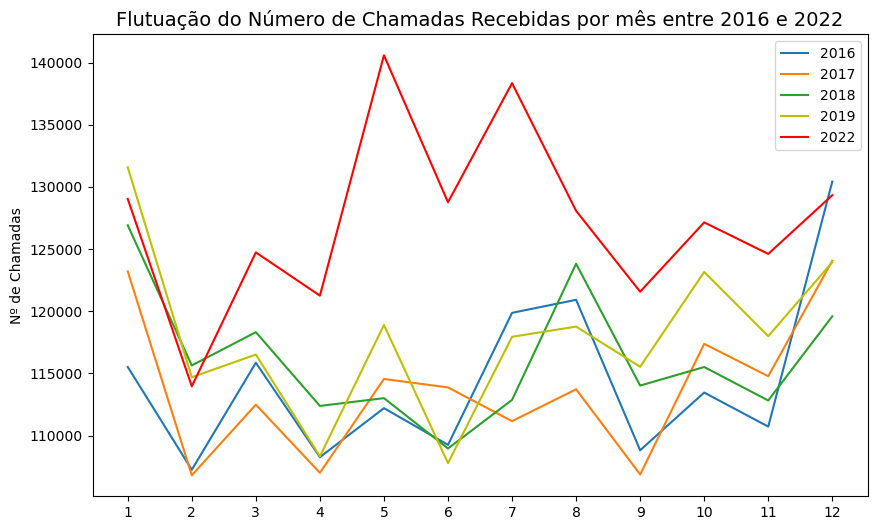

In [32]:
plt.figure(figsize=(10,6))

ano2016 = numeroChaPorMes(2016)
ano2017 = numeroChaPorMes(2017)
ano2018 = numeroChaPorMes(2018)
ano2019 = numeroChaPorMes(2019)
ano2022 = numeroChaPorMes(2022)

meses = range(1, 13)

plt.xticks(range(1, 13), meses)

plt.plot(meses, ano2016['Nº de Chamadas'], '-')
plt.plot(meses, ano2017['Nº de Chamadas'], '-')
plt.plot(meses, ano2018['Nº de Chamadas'], '-')
plt.plot(meses, ano2019['Nº de Chamadas'], 'y-')
plt.plot(meses, ano2022['Nº de Chamadas'], 'r-')

plt.title('Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['2016', '2017', '2018', '2019', '2022'])
plt.savefig('Img/Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022')
plt.show()

### Começar a ver os dias da semana

In [33]:
segundas = df[(df['Dia Semana'] == 'Segunda-feira')]
tercas = df[(df['Dia Semana'] == 'Terça-feira')]
quartas = df[(df['Dia Semana'] == 'Quarta-feira')]
quintas = df[(df['Dia Semana'] == 'Quinta-feira')]
sextas = df[(df['Dia Semana'] == 'Sexta-feira')]
sabados = df[(df['Dia Semana'] == 'Sábado')]
domingos = df[(df['Dia Semana'] == 'Domingo')]

segundas

,Dia Semana,Dia,Mês,Ano,Data,Nº de Chamadas
1,Segunda-feira,2,1,2012,2012-01-02,3263
8,Segunda-feira,9,1,2012,2012-01-09,3257
15,Segunda-feira,16,1,2012,2012-01-16,3384
22,Segunda-feira,23,1,2012,2012-01-23,3086
29,Segunda-feira,30,1,2012,2012-01-30,3224
...,...,...,...,...,...,...
4320,Segunda-feira,30,10,2023,2023-10-30,4069
4327,Segunda-feira,6,11,2023,2023-11-06,4159
4334,Segunda-feira,13,11,2023,2023-11-13,4422
4341,Segunda-feira,20,11,2023,2023-11-20,4078


Função para descobrir o numero de chamadas por dia de semana

In [34]:
#Função para determinar o numero de chamadas recebidas por
#dia da semana (pds) num MÊS!!! 

def numeroChaPDS(mes, ano):

    segEsc = segundas[((segundas['Ano'] == ano) & (segundas['Mês'] == mes))]
    terEsc = tercas[(tercas['Ano'] == ano) & (tercas['Mês'] == mes)]
    quaEsc = quartas[(quartas['Ano'] == ano) & (quartas['Mês'] == mes)]
    quiEsc = quintas[(quintas['Ano'] == ano) & (quintas['Mês'] == mes)]
    sexEsc = sextas[(sextas['Ano'] == ano) & (sextas['Mês'] == mes)]
    sabEsc = sabados[(sabados['Ano'] == ano) & (sabados['Mês'] == mes)]
    domEsc = domingos[(domingos['Ano'] == ano) & (domingos['Mês'] == mes)]

    nChamadas_Seg = segEsc['Nº de Chamadas'].sum()
    nChamadas_Ter = terEsc['Nº de Chamadas'].sum()
    nChamadas_Qua = quaEsc['Nº de Chamadas'].sum()
    nChamadas_Qui = quiEsc['Nº de Chamadas'].sum()
    nChamadas_Sex = sexEsc['Nº de Chamadas'].sum()
    nChamadas_Sab = sabEsc['Nº de Chamadas'].sum()
    nChamadas_Dom = domEsc['Nº de Chamadas'].sum()

    lista_Chamadas = [nChamadas_Seg, nChamadas_Ter, nChamadas_Qua, nChamadas_Qui,
          nChamadas_Sex, nChamadas_Sab, nChamadas_Dom]

    lista_DiaSemana = ['Segunda', 'Terça', 'Quarta',
    'Quinta', 'Sexta', 'Sábado', 'Domingo']

    new_df = pd.DataFrame({'Dia Semana': lista_DiaSemana, 
                        'Nº de Chamadas': lista_Chamadas})

    return new_df

numeroChaPDS(4,2022)

,Dia Semana,Nº de Chamadas
0,Segunda,16070
1,Terça,15859
2,Quarta,15984
3,Quinta,16251
4,Sexta,20776
5,Sábado,20510
6,Domingo,15802


### Numero total de chamadas no mes de Janeiro de 6 anos

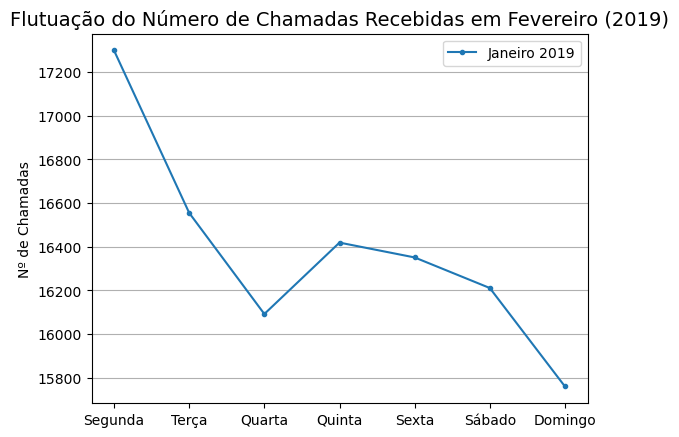

In [35]:
fev2019 = numeroChaPDS(2, 2019)

plt.plot(fev2019['Dia Semana'], fev2019['Nº de Chamadas'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2019'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)')

plt.show()

# PREVER

In [36]:
# Índice por dia com valores de 2024
n_chamadas_com_indices = df_sem_2020e2021.copy()
n_chamadas_com_indices = n_chamadas_com_indices.drop(['Dia', 'Mês', 'Ano'], axis = 1)
n_chamadas_com_indices['indice_dia'] = range(1,3622)

# Índice por dia
#n_chamadas_com_indices = df_sem_2020e2021.copy()
#n_chamadas_com_indices = n_chamadas_com_indices.drop(['Dia Semana', 'Dia', 'Mês', 'Ano'], axis = 1)
#n_chamadas_com_indices['indice_dia'] = range(1,3288)


# Índice por mês
n_chamadas_com_indices['numero_mes'] = n_chamadas_com_indices['Data'].dt.strftime('%Y-%m')
n_chamadas_com_indices['indice_mes'] = n_chamadas_com_indices.groupby('numero_mes').ngroup() + 1
n_chamadas_com_indices.drop(['numero_mes'], axis=1, inplace=True)

# Índice por Semana
n_chamadas_com_indices['numero_semana'] = n_chamadas_com_indices['Data'].dt.strftime('%Y-%U')
n_chamadas_com_indices['indice_semana'] = n_chamadas_com_indices.groupby('numero_semana').ngroup() + 1
n_chamadas_com_indices.drop(['numero_semana'], axis=1, inplace=True)

n_chamadas_com_indices

,Dia Semana,Data,Nº de Chamadas,indice_dia,indice_mes,indice_semana
0,Domingo,2012-01-01,4538,1,1,1
1,Segunda-feira,2012-01-02,3263,2,1,1
2,Terça-feira,2012-01-03,3126,3,1,1
3,Quarta-feira,2012-01-04,3199,4,1,1
4,Quinta-feira,2012-01-05,2999,5,1,1
...,...,...,...,...,...,...
4347,Domingo,2023-11-26,3722,3617,119,525
4348,Segunda-feira,2023-11-27,4165,3618,119,525
4349,Terça-feira,2023-11-28,4339,3619,119,525
4350,Quarta-feira,2023-11-29,4224,3620,119,525


### Número de chamadas por ano

In [37]:
### PREVER O NUMERO DE CHAMADAS PARA 2023 COM REGRESSÃO LINEAR

x = np.array(calls_by_year_df.index).reshape(-1, 1)
y = calls_by_year_df['Nº de Chamadas']
model_LR.fit(x, y)

indice_do_mes_a_prever = [[9]]

previsao_2023 = model_LR.predict(indice_do_mes_a_prever)

print("Previsão para o próximo ano (2023):", int(previsao_2023))

Previsão para o próximo ano (2023): 1483524


In [38]:
## Fazer data sets

n_chamadas_por_dia = n_chamadas_com_indices[['indice_dia', 'Nº de Chamadas', 'Dia Semana']]

print(n_chamadas_por_dia)

n_chamadas_por_semana = n_chamadas_com_indices.groupby(['indice_semana'])['Nº de Chamadas'].sum()
n_chamadas_por_semana = pd.DataFrame({'indice_semana': n_chamadas_por_semana.index, 'Nº de Chamadas': n_chamadas_por_semana.values})

n_chamadas_por_mes = n_chamadas_com_indices.groupby(['indice_mes'])['Nº de Chamadas'].sum()
n_chamadas_por_mes = pd.DataFrame({'indice_mes': n_chamadas_por_mes.index, 'Nº de Chamadas': n_chamadas_por_mes.values})

      indice_dia  Nº de Chamadas     Dia Semana
0              1            4538        Domingo
1              2            3263  Segunda-feira
2              3            3126    Terça-feira
3              4            3199   Quarta-feira
4              5            2999   Quinta-feira
...          ...             ...            ...
4347        3617            3722        Domingo
4348        3618            4165  Segunda-feira
4349        3619            4339    Terça-feira
4350        3620            4224   Quarta-feira
4351        3621            4176   Quinta-feira

[3621 rows x 3 columns]


### Número de chamadas por mês

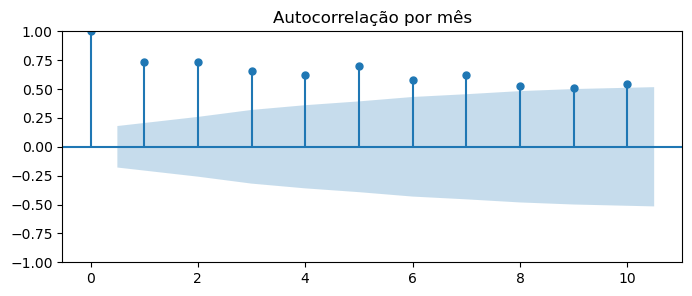

In [39]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_mes['Nº de Chamadas'], lags=10, ax=ax, title='Autocorrelação por mês')
plt.show()

# TFC 2023/2024

É a partir desta parte do caderno que o código do tfc do presente trabalho se inicia

In [40]:
from datetime import datetime

current_year = datetime.now().year - 1

mean2023 = df[(df['Ano'] == current_year + 1)]
mean2023 = mean2023.groupby(['Mês','Ano'])['Nº de Chamadas'].sum()
mean2023 = mean2023.mean()

filtered_data_year = df[
                   (df['Ano'] > current_year - 5) & 
                   ((df['Ano'] != 2020) & (df['Ano'] != 2021))]

mean_values_years = filtered_data_year.groupby(['Mês','Ano'])['Nº de Chamadas'].sum()

In [41]:
def getMultiplier(mes, last3y):
    filtered_data = df[(df['Mês'] == mes) & 
                   (df['Ano'] > current_year - 5) & 
                   ((df['Ano'] != 2020) & (df['Ano'] != 2021))]
    
    mean_values = filtered_data.groupby(['Mês','Ano'])['Nº de Chamadas'].sum()
    
    mean_values = mean_values.reset_index()
    last3y = last3y.reset_index()
    
    sum_variable = 0
    increment_variable = 0  # You can adjust the increment value

    # Loop to increment and divide values
    for i in range(len(mean_values['Nº de Chamadas'])):
        meanYear = last3y[last3y['Ano'] == mean_values['Ano'][i]]
        meanYear = meanYear['Nº de Chamadas'].mean()
        sum_variable += (mean_values['Nº de Chamadas'][i] / meanYear)
        increment_variable += 1
    
    return sum_variable/increment_variable

In [42]:
def getMeanMonth(mes):
    filtered_data = df[(df['Mês'] == mes) & 
                   (df['Ano'] > current_year - 5) & 
                   ((df['Ano'] != 2020) & (df['Ano'] != 2021))]
    
    mean_values = filtered_data.groupby(['Mês','Ano'])['Nº de Chamadas'].sum()
    
    return int(mean_values.mean())

In [43]:
def add_mean_last_3_years_column(df, date_column_name='indice_mes', value_column_name='Nº de Chamadas', new_column_name='media_mensal'):
    """
    Add a new column with the mean of the specified value_column_name for the same month in the last 3 years.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - date_column_name: str, default='indice_mes'
        The name of the column containing the date information.
    - value_column_name: str, default='Nº de Chamadas'
        The name of the column containing the values for which to calculate the mean.
    - new_column_name: str, default='mean_last_3_years'
        The name of the new column to be added.

    Returns:
    - DataFrame
        A new DataFrame with the added column.
    """

    # Ensure the DataFrame is sorted by the date_column_name
    df = df.sort_values(by=date_column_name)

    # Add a new column with the date in the format YYYY-MM
    df['year_month'] = pd.to_datetime(df[date_column_name]).dt.to_period('M')

    # Calculate the mean for the last 3 years for each month
    df[new_column_name] = df.groupby('year_month')[value_column_name].transform(lambda x: x.shift(12).rolling(36, min_periods=1).mean())

    # Fill NaN values in the new column with values from 'Nº de Chamadas'
    df[new_column_name].fillna(df[value_column_name], inplace=True)
    
    # Drop the auxiliary 'year_month' column if needed
    df = df.drop(columns=['year_month'])

    return df

In [44]:
def add_multiplier_column(df, exemplo, date_column_name='indice_mes', value_column_name='Nº de Chamadas', new_column_name='Coeficiente'):
    """
    Add a new column with calculated multipliers for each month based on the last 3 years.

    Parameters:
    - df: DataFrame
        The input DataFrame to extract data for calculations.
    - exemplo: DataFrame
        The DataFrame to be updated with the new column.
    - date_column_name: str, default='indice_mes'
        The name of the column containing the date information.
    - value_column_name: str, default='Nº de Chamadas'
        The name of the column containing the values for which to calculate the multiplier.
    - new_column_name: str, default='multiplier'
        The name of the new column to be added.

    Returns:
    - None
        Updates the 'exemplo' DataFrame with the new column.
    """

    current_year = df['Ano'].max()  # Assuming 'Ano' is the column with the year information

    mes_values = df['Mês']  # Replace 'mes' with the value you're using

    filtered_data = df[(df['Mês'].isin(mes_values)) & 
                   (df['Ano'] > current_year - 5) & 
                   ((df['Ano'] != 2020) & (df['Ano'] != 2021))]

    # Calculate the mean values for each month and year
    mean_values = filtered_data.groupby(['Mês', 'Ano'])[value_column_name].sum().reset_index()

    # Calculate the mean values for the last 3 years
    last3y = df.groupby('Ano')[value_column_name].mean().reset_index()

    sum_variable = 0
    increment_variable = 0  # You can adjust the increment value

    # Loop to increment and divide values
    for i in range(len(mean_values)):
        meanYear = last3y[last3y['Ano'] == mean_values['Ano'][i]]
        meanYear = meanYear[value_column_name].mean()
        sum_variable += (mean_values[value_column_name][i] / meanYear)
        increment_variable += 1

    # Calculate the multiplier
    multiplier = sum_variable / increment_variable

    # Update the 'exemplo' DataFrame with the new column
    exemplo[new_column_name] = multiplier
    
    return exemplo

In [45]:
def create_n_chamadas_column(df):
    # Filter out the last 5 years except 2020 and 2021
    filtered_df = df[df['Ano'].between(df['Ano'] - 5, df['Ano']) & ~df['Ano'].isin([2020, 2021])]

    # Group by 'Ano' and 'Mes' and calculate the mean of 'n_chamadas'
    grouped_df = filtered_df.groupby(['Ano', 'Mês'])['Nº de Chamadas'].sum().reset_index()

    # Calculate the mean of the monthly means for each year
    yearly_mean = grouped_df.groupby('Ano')['Nº de Chamadas'].mean().reset_index()

    # Merge the calculated mean values back to the original DataFrame
    grouped_df = pd.merge(grouped_df, yearly_mean, on='Ano', how='left', suffixes=('', '_mean'))
    

    # Create a new column 'n_chamadas' by multiplying the mean of the month with the original 'n_chamadas'
    grouped_df['Coeficiente'] = grouped_df['Nº de Chamadas'] / grouped_df['Nº de Chamadas_mean']
    
    grouped_df['n_chamadas_last_12_months_mean'] = grouped_df['Nº de Chamadas'].rolling(window=12, min_periods=1).mean() * grouped_df['Coeficiente']
    
    # Drop the intermediate mean column
    grouped_df.drop('Nº de Chamadas_mean', axis=1, inplace=True)

    return grouped_df

In [46]:
def refreshMean2024(df, numero):
    
    last_5_elements = df.tail(numero)

    mean2024 = last_5_elements['Nº de Chamadas'].mean()

    return int(mean2024)

In [47]:
'''
### PREVER O NUMERO DE CHAMADAS PARA O PRIMEIRO MÊS DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1mes_23 = model_LR.predict([[109]])
emap_mes1 = ((mean_absolute_error([[129474]], previsao_1mes_23)) / [[129474]])
r2_mes1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O SEGUNDO MÊS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [129474]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2mes_23 = model_LR.predict([[110]])
emap_mes2 = ((mean_absolute_error([[118027]], previsao_2mes_23)) / [[118027]])
r2_mes2 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O TERCEIRO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [118027]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3mes_23 = model_LR.predict([[111]])
emap_mes3 = ((mean_absolute_error([[127016]], previsao_3mes_23)) / [[127016]])
r2_mes3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O QUARTO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [127016]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4mes_23 = model_LR.predict([[112]])
emap_mes4 = ((mean_absolute_error([[118350]], previsao_4mes_23)) / [[118350]])
r2_mes4 = r2_score(y, model_LR.predict(x))

'''



### PREVER O NUMERO DE CHAMADAS PARA O QUINTO MêS DE 2023 COM REGRESSÃO LINEAR
'''
x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_5mes_23 = model_LR.predict([[113]])
emap_mes5 = ((mean_absolute_error([[127719]], previsao_5mes_23)) / [[127719]])
r2_mes5 = r2_score(y, model_LR.predict(x))

n_chamadas_por_mes['Coeficiente'] = [month5]
n_chamadas_por_mes['Media'] = [month5Mean]


reference5 = getMultiplier(5, mean_values_years)

month5 = mean2023 * (reference5)

month5Mean = getMeanMonth(5)


n_chamadas_por_mes = add_mean_last_3_years_column(n_chamadas_por_mes,'indice_mes', 'Nº de Chamadas', 'media_mensal')
new = create_n_chamadas_column(df)


n_chamadas_por_mes['Coeficiente'] = new['n_chamadas_last_12_months_mean']


# Separate the features and target variable
X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']

# Create and fit the model with the new features
model_LR = LinearRegression()
model_LR.fit(X, y)

# Make predictions
previsao_5mes_23 = model_LR.predict([[113, month5Mean, month5]])

# Evaluate the model
emap_mes5 = ((mean_absolute_error([[127719]], previsao_5mes_23)) / [[127719]])
r2_mes5 = r2_score(y, model_LR.predict(X))


### PREVER O NUMERO DE CHAMADAS PARA O SEXTO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_5mes_23], 'media_mensal': [month5Mean], 'Coeficiente':[month5]})

reference6 = getMultiplier(6, mean_values_years)

month6 = mean2023 * (reference6)

month6Mean = getMeanMonth(6)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_6mes_23 = model_LR.predict([[114, month6Mean, month6]])
emap_mes6 = ((mean_absolute_error([[124513]], previsao_6mes_23)) / [[124513]])
r2_mes6 = r2_score(y, model_LR.predict(X))




### PREVER O NUMERO DE CHAMADAS PARA O SETIMO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_6mes_23], 'media_mensal': [month6Mean], 'Coeficiente':[month6]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference7 = getMultiplier(7, mean_values_years)

month7 = mean2023 * (reference7)

month7Mean = getMeanMonth(7)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_7mes_23 = model_LR.predict([[115, month7Mean, month7]])
emap_mes7 = ((mean_absolute_error([[129581]], previsao_7mes_23)) / [[129581]])
r2_mes7 = r2_score(y, model_LR.predict(X))


### PREVER O NUMERO DE CHAMADAS PARA O OITAVO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_7mes_23], 'media_mensal': [month7Mean], 'Coeficiente':[month7]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference8 = getMultiplier(8, mean_values_years)

month8 = mean2023 * (reference8)

month8Mean = getMeanMonth(8)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_8mes_23 = model_LR.predict([[116, month8Mean, month8]])
emap_mes8 = ((mean_absolute_error([[137205]], previsao_8mes_23)) / [[137205]])
r2_mes8 = r2_score(y, model_LR.predict(X))





### PREVER O NUMERO DE CHAMADAS PARA O NONO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_8mes_23], 'media_mensal': [month8Mean], 'Coeficiente':[month8]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference9 = getMultiplier(9, mean_values_years)

month9 = mean2023 * (reference9)

month9Mean = getMeanMonth(9)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_9mes_23 = model_LR.predict([[117, month9Mean, month9]])
emap_mes9 = ((mean_absolute_error([[122446]], previsao_9mes_23)) / [[122446]])
r2_mes9 = r2_score(y, model_LR.predict(X))

'''

'''
### PREVER O NUMERO DE CHAMADAS PARA O PRIMEIRO MÊS DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1mes_23 = model_LR.predict([[109]])
emap_mes1 = ((mean_absolute_error([[129474]], previsao_1mes_23)) / [[129474]])
r2_mes1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O SEGUNDO MÊS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [129474]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2mes_23 = model_LR.predict([[110]])
emap_mes2 = ((mean_absolute_error([[118027]], previsao_2mes_23)) / [[118027]])
r2_mes2 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O TERCEIRO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [118027]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3mes_23 = model_LR.predict([[111]])
emap_mes3 = ((mean_absolute_error([[127016]], previsao_3mes_23)) / [[127016]])
r2_mes3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O QUARTO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [127016]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4mes_23 = model_LR.predict([[112]])
emap_mes4 = ((mean_absolute_error([[118350]], previsao_4mes_23)) / [[118350]])
r2_mes4 = r2_score(y, model_LR.predict(x))

'''



### PREVER O NUMERO DE CHAMADAS PARA O QUINTO MêS DE 2023 COM REGRESSÃO LINEAR
'''
x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_5mes_23 = model_LR.predict([[113]])
emap_mes5 = ((mean_absolute_error([[127719]], previsao_5mes_23)) / [[127719]])
r2_mes5 = r2_score(y, model_LR.predict(x))

n_chamadas_por_mes['Coeficiente'] = [month5]
n_chamadas_por_mes['Media'] = [month5Mean]

'''

n_chamadas_por_mes = add_mean_last_3_years_column(n_chamadas_por_mes,'indice_mes', 'Nº de Chamadas', 'media_mensal')
new = create_n_chamadas_column(df)


n_chamadas_por_mes['Coeficiente'] = new['n_chamadas_last_12_months_mean']

print(n_chamadas_por_mes)


### PREVER O NUMERO DE CHAMADAS PARA O 12 MêS DE 2023 COM REGRESSÃO LINEAR

reference12 = getMultiplier(12, mean_values_years)

month12 = int(mean2023 * (reference12))

month12Mean = getMeanMonth(12)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_12mes_23 = model_LR.predict([[120, month12Mean, month12]])


### PREVER O NUMERO DE CHAMADAS PARA O 1 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_12mes_23], 'media_mensal': [month12Mean], 'Coeficiente':[month12]})

reference1 = getMultiplier(1, mean_values_years)

month1 = int(mean2023 * (reference1))

month1Mean = getMeanMonth(1)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_1mes_24 = model_LR.predict([[121, month1Mean, month1]])


### PREVER O NUMERO DE CHAMADAS PARA O 2 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_1mes_24], 'media_mensal': [month1Mean], 'Coeficiente':[month1]})

reference2 = getMultiplier(2, mean_values_years)

month2 = int(mean2023 * (reference2))

month2Mean = getMeanMonth(2)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_2mes_24 = model_LR.predict([[122, month2Mean, month2]])


### PREVER O NUMERO DE CHAMADAS PARA O 3 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_2mes_24], 'media_mensal': [month2Mean], 'Coeficiente':[month2]})

reference3 = getMultiplier(3, mean_values_years)

month3 = int(mean2023 * (reference3))

month3Mean = getMeanMonth(3)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_3mes_24 = model_LR.predict([[123, month3Mean, month3]])

### Media 2024

mean2024 = refreshMean2024(n_chamadas_por_mes, 3)


### PREVER O NUMERO DE CHAMADAS PARA O 4 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_3mes_24], 'media_mensal': [month3Mean], 'Coeficiente':[month3]})

reference4 = getMultiplier(4, mean_values_years)

month4 = int(mean2024 * (reference4))

month4Mean = getMeanMonth(4)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_4mes_24 = model_LR.predict([[124, month4Mean, month4]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 4)

### PREVER O NUMERO DE CHAMADAS PARA O 5 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_4mes_24], 'media_mensal': [month4Mean], 'Coeficiente':[month4]})

reference5 = getMultiplier(5, mean_values_years)

month5 = int(mean2024 * (reference5))

month5Mean = getMeanMonth(5)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_5mes_24 = model_LR.predict([[125, month5Mean, month5]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 5)


### PREVER O NUMERO DE CHAMADAS PARA O 6 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_5mes_24], 'media_mensal': [month5Mean], 'Coeficiente':[month5]})

reference6 = getMultiplier(6, mean_values_years)

month6 = int(mean2024 * (reference6))

month6Mean = getMeanMonth(6)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_6mes_24 = model_LR.predict([[126, month6Mean, month6]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 6)


### PREVER O NUMERO DE CHAMADAS PARA O 7 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_6mes_24], 'media_mensal': [month6Mean], 'Coeficiente':[month6]})

reference7 = getMultiplier(7, mean_values_years)

month7 = int(mean2024 * (reference7))

month7Mean = getMeanMonth(7)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_7mes_24 = model_LR.predict([[127, month7Mean, month7]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 7)


### PREVER O NUMERO DE CHAMADAS PARA O 8 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_7mes_24], 'media_mensal': [month7Mean], 'Coeficiente':[month7]})

reference8 = getMultiplier(8, mean_values_years)

month8 = int(mean2024 * (reference8))

month8Mean = getMeanMonth(8)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_8mes_24 = model_LR.predict([[128, month8Mean, month8]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 8)


### PREVER O NUMERO DE CHAMADAS PARA O 9 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_8mes_24], 'media_mensal': [month8Mean], 'Coeficiente':[month8]})

reference9 = getMultiplier(9, mean_values_years)

month9 = int(mean2024 * (reference9))

month9Mean = getMeanMonth(9)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_9mes_24 = model_LR.predict([[129, month9Mean, month9]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 9)


### PREVER O NUMERO DE CHAMADAS PARA O 10 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_9mes_24], 'media_mensal': [month9Mean], 'Coeficiente':[month9]})

reference10 = getMultiplier(10, mean_values_years)

month10 = int(mean2024 * (reference10))

month10Mean = getMeanMonth(10)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_10mes_24 = model_LR.predict([[130, month10Mean, month10]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 10)


### PREVER O NUMERO DE CHAMADAS PARA O 11 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_10mes_24], 'media_mensal': [month10Mean], 'Coeficiente':[month10]})

reference11 = getMultiplier(11, mean_values_years)

month11 = int(mean2024 * (reference11))

month11Mean = getMeanMonth(11)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_11mes_24 = model_LR.predict([[131, month11Mean, month11]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 11)


### PREVER O NUMERO DE CHAMADAS PARA O 12 MêS DE 2024 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_11mes_24], 'media_mensal': [month11Mean], 'Coeficiente':[month11]})

reference12 = getMultiplier(12, mean_values_years)

month12 = int(mean2024 * (reference12))

month12Mean = getMeanMonth(12)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
previsao_12mes_24 = model_LR.predict([[132, month11Mean, month11]])

mean2024 = refreshMean2024(n_chamadas_por_mes, 12)

     indice_mes  Nº de Chamadas   media_mensal    Coeficiente
0             1           98366   98366.000000  100921.369654
1             2          106837  106837.000000  114332.186125
2             3          101028  101028.000000  107562.965337
3             4           84680   84680.000000   86316.110539
4             5           96249   96249.000000   97811.733654
..          ...             ...            ...            ...
114         115          129581  118954.805556  129735.724550
115         116          137205  119353.500000  138202.219019
116         117          122446  119761.833333  123407.530397
117         118          123470  120033.194444  124138.042197
118         119          120506  120306.472222  120829.172083

[119 rows x 4 columns]


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature n

In [48]:
ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [previsao_12mes_23], 'media_mensal': [month12Mean], 'Coeficiente':[month12]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

In [49]:
# TABELA 

data_D = ['Dezembro', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
valor_previsto_D = [int(previsao_12mes_23), int(previsao_1mes_24), int(previsao_2mes_24), int(previsao_3mes_24), int(previsao_4mes_24), int(previsao_5mes_24), int(previsao_6mes_24), int(previsao_7mes_24), int(previsao_8mes_24), int(previsao_9mes_24), int(previsao_10mes_24), int(previsao_11mes_24), int(previsao_12mes_24)]


tabela_Dia2 = pd.DataFrame({
    'Mês': data_D,
    'Valor Previsto': valor_previsto_D
})

tabela_Dia2['Valor Previsto'] = tabela_Dia2['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia2




,Mês,Valor Previsto
0,Dezembro,129 595
1,Janeiro,132 339
2,Fevereiro,122 235
3,Março,126 689
4,Abril,124 148
5,Maio,131 344
6,Junho,125 085
7,Julho,131 218
8,Agosto,132 858
9,Setembro,126 879


### Lags

In [25]:
def create_lag_df(df, lag, cols):
    return df.assign(
        **{f"{col}-{n}": df[col].shift(n) for n in range(1, lag + 1) for col in cols}
    )

In [51]:
import matplotlib.pyplot as plt

In [52]:
xticks = pd.date_range(start=chamadas_lag7['indice_mes'].index.min(), end=chamadas_lag7['indice_mes'].index.max(), freq="D")
print(xticks)

def eval_on_features(features, target, regressor, n_train = 214, chamadas_data=False, ylabel='Chamadas'):
    # split the given features into a training and a test set
    #X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    #y_train, y_test = target[:n_train], target[n_train:]
    X_train, X_test, y_train, y_test = train_test_split(X_lag_features_imp, y, test_size=0.2, random_state=42)
    
    regressor.fit(X_train, y_train)
    print("Train-set R^2: {:.2f}".format(regressor.score(X_train, y_train)))
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    if not chamadas_data:
        #plt.xticks(range(0, len(features), 8), xticks.strftime("%m %a"), rotation=90, ha="left")
        plt.xticks(range(0, len(features), 8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.xticks(rotation=45)


    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")

    plt.plot(
        range(n_train, len(y_test) + n_train), y_pred, "--", label="prediction test"
    )
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel(ylabel)

NameError: name 'chamadas_lag7' is not defined

In [53]:
#n_chamadas_por_mes = n_chamadas_por_mes[n_chamadas_por_mes['indice_mes'] != 0]
chamadas_lag7 = create_lag_df(n_chamadas_por_mes, 7, ['Nº de Chamadas'] )

columns_to_drop = ['media_mensal', 'Coeficiente']
chamadas_lag7 = chamadas_lag7.drop(columns=columns_to_drop, errors='ignore')

In [54]:
chamadas_lag7

,indice_mes,Nº de Chamadas,Nº de Chamadas-1,Nº de Chamadas-2,Nº de Chamadas-3,Nº de Chamadas-4,Nº de Chamadas-5,Nº de Chamadas-6,Nº de Chamadas-7
0,1,98366,None,None,None,None,None,None,None
1,2,106837,98366,None,None,None,None,None,None
2,3,101028,106837,98366,None,None,None,None,None
3,4,84680,101028,106837,98366,None,None,None,None
4,5,96249,84680,101028,106837,98366,None,None,None
...,...,...,...,...,...,...,...,...,...
127,128,[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071]
128,129,[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106]
129,130,[130446.57561119022],[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617]
130,131,[127811.25677724455],[130446.57561119022],[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061]


In [55]:
chamadas_lag7 = chamadas_lag7.dropna(subset=['Nº de Chamadas-1', 'Nº de Chamadas-2', 'Nº de Chamadas-3', 'Nº de Chamadas-4', 'Nº de Chamadas-5', 'Nº de Chamadas-6', 'Nº de Chamadas-7', 'indice_mes'])

In [56]:
X_lag_features = chamadas_lag7.drop(columns=['Nº de Chamadas', 'indice_mes']).to_numpy()
y = chamadas_lag7['indice_mes'].values

In [57]:
imp = SimpleImputer()
X_lag_features_imp = imp.fit_transform(X_lag_features)

In [58]:
n_chamadas_por_mes_lag_7 = create_lag_df(n_chamadas_por_mes, 7, ["Nº de Chamadas"])

columns_to_drop = ['media_mensal', 'Coeficiente']
n_chamadas_por_mes_lag_7 = n_chamadas_por_mes_lag_7.drop(columns=columns_to_drop, errors='ignore')

In [59]:
n_chamadas_por_mes_train = n_chamadas_por_mes_lag_7.query("indice_mes <= 119")
n_chamadas_por_mes_test = n_chamadas_por_mes_lag_7.query("indice_mes >  119")
n_chamadas_por_mes_train

,indice_mes,Nº de Chamadas,Nº de Chamadas-1,Nº de Chamadas-2,Nº de Chamadas-3,Nº de Chamadas-4,Nº de Chamadas-5,Nº de Chamadas-6,Nº de Chamadas-7
0,1,98366,None,None,None,None,None,None,None
1,2,106837,98366,None,None,None,None,None,None
2,3,101028,106837,98366,None,None,None,None,None
3,4,84680,101028,106837,98366,None,None,None,None
4,5,96249,84680,101028,106837,98366,None,None,None
...,...,...,...,...,...,...,...,...,...
114,115,129581,124513,127719,118350,127016,118027,129474,129333
115,116,137205,129581,124513,127719,118350,127016,118027,129474
116,117,122446,137205,129581,124513,127719,118350,127016,118027
117,118,123470,122446,137205,129581,124513,127719,118350,127016


In [60]:
n_chamadas_train_lag_7 = n_chamadas_por_mes_lag_7[7:].drop(columns=["indice_mes"])

In [61]:
n_chamadas_train_lag_7_X = n_chamadas_train_lag_7.drop(columns=["Nº de Chamadas"])
n_chamadas_train_lag_7_y = n_chamadas_train_lag_7["Nº de Chamadas"]


In [62]:
from sklearn.ensemble import RandomForestRegressor
n_chamadas_model = RandomForestRegressor(random_state=42)
n_chamadas_model.fit(n_chamadas_train_lag_7_X, n_chamadas_train_lag_7_y);
print("Train-set R^2: {:.2f}".format(n_chamadas_model.score(n_chamadas_train_lag_7_X, n_chamadas_train_lag_7_y)))

Train-set R^2: 0.96


In [63]:
n_chamadas_por_mes_test

,indice_mes,Nº de Chamadas,Nº de Chamadas-1,Nº de Chamadas-2,Nº de Chamadas-3,Nº de Chamadas-4,Nº de Chamadas-5,Nº de Chamadas-6,Nº de Chamadas-7
119,120,[129595.24206418986],120506,123470,122446,137205,129581,124513,127719
120,121,[132339.2214778071],[129595.24206418986],120506,123470,122446,137205,129581,124513
121,122,[122235.75015392106],[132339.2214778071],[129595.24206418986],120506,123470,122446,137205,129581
122,123,[126689.18020136617],[122235.75015392106],[132339.2214778071],[129595.24206418986],120506,123470,122446,137205
123,124,[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071],[129595.24206418986],120506,123470,122446
124,125,[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071],[129595.24206418986],120506,123470
125,126,[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071],[129595.24206418986],120506
126,127,[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071],[129595.24206418986]
127,128,[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071]
128,129,[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106]


In [64]:
preds = n_chamadas_model.predict(n_chamadas_por_mes_test.drop(columns=["indice_mes", "Nº de Chamadas"]))
preds

array([129016.51219945, 130448.50595521, 124442.75995064, 126376.16186539,
       124717.16998635, 131173.90573166, 125416.25858586, 129149.68173805,
       131575.38693877, 125812.77242752, 129065.42573625, 128454.14910208,
       129416.79485981])

In [65]:
sum_preds = preds.sum() - 129016.51219945
sum_preds

1536048.9728775956

In [66]:
retail_test_5_preds = n_chamadas_por_mes_test.assign(predicted_calls=preds)
retail_test_5_preds.tail()

,indice_mes,Nº de Chamadas,Nº de Chamadas-1,Nº de Chamadas-2,Nº de Chamadas-3,Nº de Chamadas-4,Nº de Chamadas-5,Nº de Chamadas-6,Nº de Chamadas-7,predicted_calls
127,128,[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],[132339.2214778071],131575.386939
128,129,[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],[122235.75015392106],125812.772428
129,130,[130446.57561119022],[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],[126689.18020136617],129065.425736
130,131,[127811.25677724455],[130446.57561119022],[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],[124148.01783794061],128454.149102
131,132,[129595.24206418986],[127811.25677724455],[130446.57561119022],[126879.444156498],[132858.3203642728],[131218.5220110151],[125085.24072993593],[131344.32717482402],129416.794860


In [67]:
n_chamadas_por_mes = n_chamadas_por_mes.drop(n_chamadas_por_mes.tail(12).index)

In [68]:
reference5 = getMultiplier(5, mean_values_years)

month5 = mean2023 * (reference5)

month5Mean = getMeanMonth(5)

# Separate the features and target variable
X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']

# Create and fit the model with the new features
model_LR = LinearRegression()
model_LR.fit(X, y)

# Evaluate the model
emap_mes5 = ((mean_absolute_error([[127719]], [[126627.91057566]])) / [[127719]])
r2_mes5 = r2_score(y, model_LR.predict(X))


### PREVER O NUMERO DE CHAMADAS PARA O SEXTO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [126627.91057566], 'media_mensal': [month5Mean], 'Coeficiente':[month5]})

reference6 = getMultiplier(6, mean_values_years)

month6 = mean2023 * (reference6)

month6Mean = getMeanMonth(6)

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
emap_mes6 = ((mean_absolute_error([[124513]], [[123154.39261181]])) / [[124513]])
r2_mes6 = r2_score(y, model_LR.predict(X))


### PREVER O NUMERO DE CHAMADAS PARA O SETIMO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [123154.39261181], 'media_mensal': [month6Mean], 'Coeficiente':[month6]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference7 = getMultiplier(7, mean_values_years)

month7 = mean2023 * (reference7)

month7Mean = getMeanMonth(7)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
emap_mes7 = ((mean_absolute_error([[129581]], [[125314.29348549]])) / [[129581]])
r2_mes7 = r2_score(y, model_LR.predict(X))


### PREVER O NUMERO DE CHAMADAS PARA O OITAVO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [125314.29348549], 'media_mensal': [month7Mean], 'Coeficiente':[month7]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference8 = getMultiplier(8, mean_values_years)

month8 = mean2023 * (reference8)

month8Mean = getMeanMonth(8)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
emap_mes8 = ((mean_absolute_error([[137205]], [[126602.67686764]])) / [[137205]])
r2_mes8 = r2_score(y, model_LR.predict(X))





### PREVER O NUMERO DE CHAMADAS PARA O NONO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [126602.67686764], 'media_mensal': [month8Mean], 'Coeficiente':[month8]})

n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)
n_chamadas_por_mes = n_chamadas_por_mes.sort_values(by='indice_mes')

reference9 = getMultiplier(9, mean_values_years)

month9 = mean2023 * (reference9)

month9Mean = getMeanMonth(9)

X = n_chamadas_por_mes[['indice_mes', 'media_mensal', 'Coeficiente']]
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(X, y)
emap_mes9 = ((mean_absolute_error([[122446]], [[122972.30685146]])) / [[122446]])
r2_mes9 = r2_score(y, model_LR.predict(X))

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [122972.30685146], 'media_mensal': [month9Mean], 'Coeficiente':[month9]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

In [69]:
data_D = ['Maio', 'Junho', 'Julho', 'Agosto', 'Setembro']
valor_previsto_D = [int(126628), int(123154), int(125314), int(126603), int(122972)]
valor_real_D = [127719, 124513, 129581, 137205, 122446]
emap_D = [float(emap_mes5), float(emap_mes6), float(emap_mes7), float(emap_mes8), float(emap_mes9)]
r2_D = [float(r2_mes5), float(r2_mes6), float(r2_mes7), float(r2_mes8), float(r2_mes9)]

tabela_Dia = pd.DataFrame({
    'Mês': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

,Mês,Valor Real,Valor Previsto,Erro Médio Absoluto,R2
0,Maio,127 719,126 628,0.854%,0.953
1,Junho,124 513,123 154,1.091%,0.953
2,Julho,129 581,125 314,3.293%,0.954
3,Agosto,137 205,126 603,7.727%,0.954
4,Setembro,122 446,122 972,0.430%,0.953


## Diário

In [70]:
n_chamadas_por_dia = n_chamadas_com_indices[['indice_dia', 'Nº de Chamadas', 'Dia Semana']]

n_chamadas_por_dia['media_ultimos30'] = n_chamadas_por_dia['Nº de Chamadas'].rolling(window=30, min_periods=1).mean()

n_chamadas_por_dia['media_ultimos30'].fillna(n_chamadas_por_dia['Nº de Chamadas'], inplace=True)

n_chamadas_por_dia = n_chamadas_por_dia[n_chamadas_por_dia['indice_dia'] <= 3407]

print(n_chamadas_por_dia)

      indice_dia  Nº de Chamadas     Dia Semana  media_ultimos30
0              1            4538        Domingo      4538.000000
1              2            3263  Segunda-feira      3900.500000
2              3            3126    Terça-feira      3642.333333
3              4            3199   Quarta-feira      3531.500000
4              5            2999   Quinta-feira      3425.000000
...          ...             ...            ...              ...
4133        3403            4083   Quarta-feira      3947.533333
4134        3404            4263   Quinta-feira      3949.466667
4135        3405            4150    Sexta-feira      3960.200000
4136        3406            3867         Sábado      3951.966667
4137        3407            3867        Domingo      3945.000000

[3407 rows x 4 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_3524\122982231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_chamadas_por_dia['media_ultimos30'] = n_chamadas_por_dia['Nº de Chamadas'].rolling(window=30, min_periods=1).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_3524\122982231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_chamadas_por_dia['media_ultimos30'].fillna(n_chamadas_por_dia['Nº de Chamadas'], inplace=True)


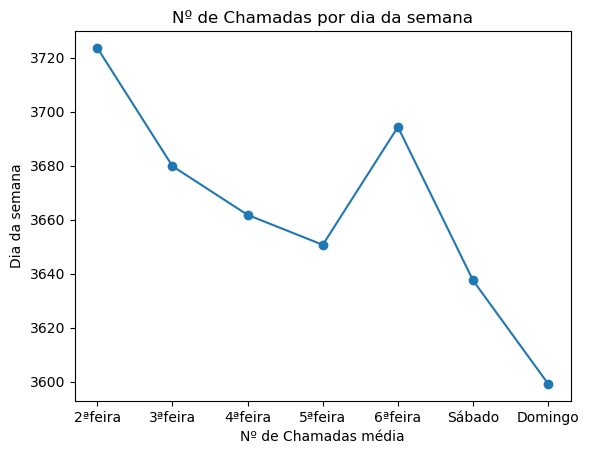

[3723.6386037  3679.81724846 3661.7654321  3650.67489712 3694.34979424
 3637.46406571 3599.14139344]


In [71]:
seg = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Segunda-feira']
mean_seg = seg['Nº de Chamadas'].mean()

ter = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Terça-feira']
mean_ter = ter['Nº de Chamadas'].mean()

qua = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Quarta-feira']
mean_qua = qua['Nº de Chamadas'].mean()

qui = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Quinta-feira']
mean_qui = qui['Nº de Chamadas'].mean()

sex = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Sexta-feira']
mean_sex = sex['Nº de Chamadas'].mean()

sab = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Sábado']
mean_sab = sab['Nº de Chamadas'].mean()

dom = n_chamadas_por_dia[n_chamadas_por_dia['Dia Semana'] == 'Domingo']
mean_dom = dom['Nº de Chamadas'].mean()

integer_array = np.array([mean_seg, mean_ter, mean_qua, mean_qui, mean_sex, mean_sab, mean_dom])

days_of_week = ['2ªfeira', '3ªfeira', '4ªfeira', '5ªfeira', '6ªfeira', 'Sábado', 'Domingo']

# Plot the integer array
plt.plot(days_of_week, integer_array, marker='o')

plt.title('Nº de Chamadas por dia da semana')
plt.xlabel('Nº de Chamadas média')
plt.ylabel('Dia da semana')

# Show the plot
plt.show()

print(integer_array)

In [72]:
def get_last_4_entries_mean(df):
    
    last_entry = df.tail(1)

    column_value = last_entry['Dia Semana'].values[0]
    
    diasSemana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
    
    diaSemana = 'Segunda-feira'
    
    if diasSemana.index(column_value) + 1 > len(diasSemana) - 1:
        diaSemana = diasSemana[0]
    else:
        diaSemana = diasSemana[diasSemana.index(column_value) + 1]

    # Filter the DataFrame to include only rows where 'Dia Semana' is 'segundafeira'
    filtered_df = df[df['Dia Semana'] == diaSemana]

    # Sort the DataFrame by some timestamp column, assuming you have a timestamp column 'Timestamp'
    sorted_df = filtered_df.sort_values(by='indice_dia', ascending=False)

    # Take the last 4 entries
    last_4_entries = sorted_df.head(8)

    # Calculate the mean of the values in the column of interest
    mean_value = last_4_entries['Nº de Chamadas'].mean()  # Replace 'YourColumnName' with the actual column name
    
    return int(mean_value)

In [73]:
def create_mean_diaSemana_column(dataset):
    # Assuming 'Dia Semana' is a column in your dataset
    if 'Dia Semana' not in dataset.columns:
        raise ValueError("The 'Dia Semana' column is not present in the dataset.")

    # Create a new column to store the mean values
    dataset['mean_diaSemana'] = None

    # Iterate through the unique values in 'Dia Semana'
    for dia_semana in dataset['Dia Semana'].unique():
        # Get the indices for the current 'Dia Semana'
        indices = dataset.index[dataset['Dia Semana'] == dia_semana]

        # Calculate the rolling mean and assign it to the 'mean_diaSemana' column
        dataset.loc[indices, 'mean_diaSemana'] = dataset.loc[indices, 'Nº de Chamadas'].rolling(window=4, min_periods=1).mean()

    return dataset

In [74]:
def get_weekDay(df):
    
    last_entry = df.tail(1)

    column_value = last_entry['Dia Semana'].values[0]
    
    diasSemana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
    
    diaSemana = 'Segunda-feira'
    
    if diasSemana.index(column_value) + 1 > len(diasSemana) - 1:
        diaSemana = diasSemana[0]
    else:
        diaSemana = diasSemana[diasSemana.index(column_value) + 1]
        
    return diaSemana

In [75]:
def mean_of_last_30_entries(dataframe):
    last_30_entries = dataframe.tail(30)
    mean_value = last_30_entries['Nº de Chamadas'].mean()

    return int(mean_value)

In [76]:
n_chamadas_por_dia = create_mean_diaSemana_column(n_chamadas_por_dia)

print(n_chamadas_por_dia)

### dia 1 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia1 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana1 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia1 = model_LR.predict([[3408, mean_dia1, mean_diaSemana1]])
emap_dia1 = ((mean_absolute_error([[3922]], previsao_dia1)) / [[3922]])
r2_dia1 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia1], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia1], 'mean_diaSemana': [mean_diaSemana1]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 2 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia2 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana2 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia2 = model_LR.predict([[3409, mean_dia2, mean_diaSemana2]])
emap_dia2 = ((mean_absolute_error([[4507]], previsao_dia2)) / [[4507]])
r2_dia2 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia2], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia2], 'mean_diaSemana': [mean_diaSemana2]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 3 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia3 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana3 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia3 = model_LR.predict([[3410, mean_dia3, mean_diaSemana3]])
emap_dia3 = ((mean_absolute_error([[4200]], previsao_dia3)) / [[4200]])
r2_dia3 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia3], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia3], 'mean_diaSemana': [mean_diaSemana3]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 4 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia4 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana4 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia4 = model_LR.predict([[3411, mean_dia4, mean_diaSemana4]])
emap_dia4 = ((mean_absolute_error([[3926]], previsao_dia4)) / [[3926]])
r2_dia4 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia4], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia4], 'mean_diaSemana': [mean_diaSemana4]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 5 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia5 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana5 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia5 = model_LR.predict([[3412, mean_dia5, mean_diaSemana5]])
emap_dia5 = ((mean_absolute_error([[4058]], previsao_dia5)) / [[4058]])
r2_dia5 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia5], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia5], 'mean_diaSemana': [mean_diaSemana5]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 6 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia6 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana6 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia6 = model_LR.predict([[3413, mean_dia5, mean_diaSemana6]])
emap_dia6 = ((mean_absolute_error([[3850]], previsao_dia6)) / [[3850]])
r2_dia6 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia6], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia6], 'mean_diaSemana': [mean_diaSemana6]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 7 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia7 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana7 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia7 = model_LR.predict([[3414, mean_dia7, mean_diaSemana7]])
emap_dia7 = ((mean_absolute_error([[3852]], previsao_dia7)) / [[3852]])
r2_dia7 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia7], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia7], 'mean_diaSemana': [mean_diaSemana7]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 8 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia8 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana8 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia8 = model_LR.predict([[3415, mean_dia8, mean_diaSemana8]])
emap_dia8 = ((mean_absolute_error([[4280]], previsao_dia8)) / [[4280]])
r2_dia8 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia8], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia8], 'mean_diaSemana': [mean_diaSemana8]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 9 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia9 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana9 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia9 = model_LR.predict([[3416, mean_dia9, mean_diaSemana9]])
emap_dia9 = ((mean_absolute_error([[4215]], previsao_dia9)) / [[4215]])
r2_dia9 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia9], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia9], 'mean_diaSemana': [mean_diaSemana9]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 10 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia10 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana10 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia10 = model_LR.predict([[3417, mean_dia10, mean_diaSemana10]])
emap_dia10 = ((mean_absolute_error([[3944]], previsao_dia10)) / [[3944]])
r2_dia10 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia10], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia10], 'mean_diaSemana': [mean_diaSemana10]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 11 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia11 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana11 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia11 = model_LR.predict([[3418, mean_dia11, mean_diaSemana11]])
emap_dia11 = ((mean_absolute_error([[4144]], previsao_dia11)) / [[4144]])
r2_dia11 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia11], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia11], 'mean_diaSemana': [mean_diaSemana11]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 12 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia12 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana12 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia12 = model_LR.predict([[3419, mean_dia12, mean_diaSemana12]])
emap_dia12 = ((mean_absolute_error([[4083]], previsao_dia12)) / [[4083]])
r2_dia12 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia12], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia12], 'mean_diaSemana': [mean_diaSemana12]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 13 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_diaSemana13 = get_last_4_entries_mean(n_chamadas_por_dia)
mean_dia13 = mean_of_last_30_entries(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia13 = model_LR.predict([[3420, mean_dia13, mean_diaSemana13]])
emap_dia13 = ((mean_absolute_error([[3825]], previsao_dia13)) / [[3825]])
r2_dia13 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia13], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia13], 'mean_diaSemana': [mean_diaSemana13]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 14 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia14 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana14 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia14 = model_LR.predict([[3421, mean_dia14, mean_diaSemana14]])
emap_dia14 = ((mean_absolute_error([[3941]], previsao_dia14)) / [[3941]])
r2_dia14 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia14], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia14], 'mean_diaSemana': [mean_diaSemana14]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 15 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia15 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana15 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia15 = model_LR.predict([[3421, mean_dia15, mean_diaSemana15]])
emap_dia15 = ((mean_absolute_error([[4335]], previsao_dia15)) / [[4335]])
r2_dia15 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia15], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia15], 'mean_diaSemana': [mean_diaSemana15]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 16 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia16 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana16 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia16 = model_LR.predict([[3422, mean_dia16, mean_diaSemana16]])
emap_dia16 = ((mean_absolute_error([[4172]], previsao_dia16)) / [[4172]])
r2_dia16 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia16], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia16], 'mean_diaSemana': [mean_diaSemana16]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 17 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia17 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana17 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia17 = model_LR.predict([[3423, mean_dia17, mean_diaSemana17]])
emap_dia17 = ((mean_absolute_error([[4181]], previsao_dia17)) / [[4181]])
r2_dia17 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia17], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia17], 'mean_diaSemana': [mean_diaSemana17]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 18 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia18 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana18 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia18 = model_LR.predict([[3424, mean_dia18, mean_diaSemana18]])
emap_dia18 = ((mean_absolute_error([[4192]], previsao_dia18)) / [[4192]])
r2_dia18 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia18], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia18], 'mean_diaSemana': [mean_diaSemana18]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 19 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia19 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana19 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia19 = model_LR.predict([[3425, mean_dia19, mean_diaSemana19]])
emap_dia19 = ((mean_absolute_error([[4270]], previsao_dia19)) / [[4270]])
r2_dia19 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia19], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia19], 'mean_diaSemana': [mean_diaSemana19]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 20 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia20 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana20 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia20 = model_LR.predict([[3426, mean_dia20, mean_diaSemana20]])
emap_dia20 = ((mean_absolute_error([[3904]], previsao_dia20)) / [[3904]])
r2_dia20 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia20], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia20], 'mean_diaSemana': [mean_diaSemana20]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 21 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia21 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana21 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia21 = model_LR.predict([[3427, mean_dia21, mean_diaSemana21]])
emap_dia21 = ((mean_absolute_error([[3870]], previsao_dia21)) / [[3870]])
r2_dia21 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia21], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia21], 'mean_diaSemana': [mean_diaSemana21]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 22 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia22 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana22 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia22 = model_LR.predict([[3428, mean_dia22, mean_diaSemana22]])
emap_dia22 = ((mean_absolute_error([[4586]], previsao_dia22)) / [[4586]])
r2_dia22 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia22], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia22], 'mean_diaSemana': [mean_diaSemana22]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 23 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia23 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana23 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia23 = model_LR.predict([[3429, mean_dia23, mean_diaSemana23]])
emap_dia23 = ((mean_absolute_error([[4322]], previsao_dia23)) / [[4322]])
r2_dia23 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia23], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia23], 'mean_diaSemana': [mean_diaSemana23]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 24 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia24 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana24 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia24 = model_LR.predict([[3430, mean_dia24, mean_diaSemana24]])
emap_dia24 = ((mean_absolute_error([[4219]], previsao_dia24)) / [[4219]])
r2_dia24 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia24], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia24], 'mean_diaSemana': [mean_diaSemana24]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 25 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia25 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana25 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia25 = model_LR.predict([[3431, mean_dia25, mean_diaSemana25]])
emap_dia25 = ((mean_absolute_error([[4336]], previsao_dia25)) / [[4336]])
r2_dia25 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia25], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia25], 'mean_diaSemana': [mean_diaSemana25]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 26 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia26 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana26 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia26 = model_LR.predict([[3432, mean_dia26, mean_diaSemana26]])
emap_dia26 = ((mean_absolute_error([[4108]], previsao_dia26)) / [[4108]])
r2_dia26 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia26], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia26], 'mean_diaSemana': [mean_diaSemana26]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 27 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia27 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana27 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia27 = model_LR.predict([[3433, mean_dia27, mean_diaSemana27]])
emap_dia27 = ((mean_absolute_error([[4017]], previsao_dia27)) / [[4017]])
r2_dia27 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia27], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia27], 'mean_diaSemana': [mean_diaSemana27]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 28 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia28 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana28 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia28 = model_LR.predict([[3434, mean_dia28, mean_diaSemana28]])
emap_dia28 = ((mean_absolute_error([[3830]], previsao_dia28)) / [[3830]])
r2_dia28 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia28], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia28], 'mean_diaSemana': [mean_diaSemana28]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 29 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia29 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana29 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia29 = model_LR.predict([[3435, mean_dia29, mean_diaSemana29]])
emap_dia29 = ((mean_absolute_error([[4269]], previsao_dia29)) / [[4269]])
r2_dia29 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia29], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia29], 'mean_diaSemana': [mean_diaSemana29]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 30 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia30 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana30 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia30 = model_LR.predict([[3436, mean_dia30, mean_diaSemana30]])
emap_dia30 = ((mean_absolute_error([[4180]], previsao_dia30)) / [[4180]])
r2_dia30 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia30], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia30], 'mean_diaSemana': [mean_diaSemana30]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 31 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia31 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana31 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia31 = model_LR.predict([[3437, mean_dia31, mean_diaSemana31]])
emap_dia31 = ((mean_absolute_error([[4181]], previsao_dia31)) / [[4181]])
r2_dia31 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia31], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia31], 'mean_diaSemana': [mean_diaSemana31]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

      indice_dia  Nº de Chamadas     Dia Semana  media_ultimos30  \
0              1            4538        Domingo      4538.000000   
1              2            3263  Segunda-feira      3900.500000   
2              3            3126    Terça-feira      3642.333333   
3              4            3199   Quarta-feira      3531.500000   
4              5            2999   Quinta-feira      3425.000000   
...          ...             ...            ...              ...   
4133        3403            4083   Quarta-feira      3947.533333   
4134        3404            4263   Quinta-feira      3949.466667   
4135        3405            4150    Sexta-feira      3960.200000   
4136        3406            3867         Sábado      3951.966667   
4137        3407            3867        Domingo      3945.000000   

     mean_diaSemana  
0            4538.0  
1            3263.0  
2            3126.0  
3            3199.0  
4            2999.0  
...             ...  
4133         3947.5  
4134   

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature n

In [77]:
# TABELA 

data_D = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5', 'Dia 6', 'Dia 7', 'Dia 8', 'Dia 9', 'Dia 10', 'Dia 11', 'Dia 12', 'Dia 13', 'Dia 14', 'Dia 15', 'Dia 16', 'Dia 17', 'Dia 18', 'Dia 19', 'Dia 20', 'Dia 21', 'Dia 22', 'Dia 23', 'Dia 24', 'Dia 25', 'Dia 26', 'Dia 27', 'Dia 28', 'Dia 29', 'Dia 30', 'Dia 31']
valor_previsto_D = [int(previsao_dia1), int(previsao_dia2), int(previsao_dia3), int(previsao_dia4), int(previsao_dia5), int(previsao_dia6), int(previsao_dia7), int(previsao_dia8), int(previsao_dia9), int(previsao_dia10), int(previsao_dia11), int(previsao_dia12), int(previsao_dia13), int(previsao_dia14), int(previsao_dia15), int(previsao_dia16), int(previsao_dia17), int(previsao_dia18), int(previsao_dia19), int(previsao_dia20), int(previsao_dia21), int(previsao_dia22), int(previsao_dia23), int(previsao_dia24), int(previsao_dia25), int(previsao_dia26), int(previsao_dia27), int(previsao_dia28), int(previsao_dia29), int(previsao_dia30), int(previsao_dia31)]
valor_real_D = [3922, 4507, 4200, 3926, 4058, 3850, 3852, 4280, 4215, 3944, 4144, 4083, 3825, 3941, 4335, 4172, 4181, 4192, 4270, 3904, 3870, 4586, 4322, 4219, 4336, 4108, 4017, 3830, 4269, 4180, 4181]
emap_D = [float(emap_dia1), float(emap_dia2), float(emap_dia3), float(emap_dia4), float(emap_dia5), float(emap_dia6), float(emap_dia7), float(emap_dia8), float(emap_dia9), float(emap_dia10), float(emap_dia11), float(emap_dia12), float(emap_dia13), float(emap_dia14), float(emap_dia15), float(emap_dia16), float(emap_dia17), float(emap_dia18), float(emap_dia19), float(emap_dia20), float(emap_dia21), float(emap_dia22), float(emap_dia23), float(emap_dia24), float(emap_dia25), float(emap_dia26), float(emap_dia27), float(emap_dia28), float(emap_dia29), float(emap_dia30), float(emap_dia31)]
r2_D = [float(r2_dia1), float(r2_dia2), float(r2_dia3), float(r2_dia4), float(r2_dia5), float(r2_dia6), float(r2_dia7), float(r2_dia8), float(r2_dia9), float(r2_dia10), float(r2_dia11), float(r2_dia12), float(r2_dia13), float(r2_dia14), float(r2_dia15), float(r2_dia16), float(r2_dia17), float(r2_dia18), float(r2_dia19), float(r2_dia20), float(r2_dia21), float(r2_dia22), float(r2_dia23), float(r2_dia24), float(r2_dia25), float(r2_dia26), float(r2_dia27), float(r2_dia28), float(r2_dia29), float(r2_dia30), float(r2_dia31)]

tabela_Dia = pd.DataFrame({
    'Dia': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

,Dia,Valor Real,Valor Previsto,Erro Médio Absoluto,R2
0,Dia 1,3 922,4 352,10.964%,0.8
1,Dia 2,4 507,4 072,9.635%,0.801
2,Dia 3,4 200,4 031,4.009%,0.801
3,Dia 4,3 926,4 076,3.841%,0.801
4,Dia 5,4 058,4 055,0.055%,0.801
5,Dia 6,3 850,3 896,1.209%,0.801
6,Dia 7,3 852,3 839,0.321%,0.801
7,Dia 8,4 280,4 330,1.180%,0.801
8,Dia 9,4 215,4 033,4.297%,0.801
9,Dia 10,3 944,3 988,1.131%,0.801


## Lags Diários

In [78]:
lags_diarios = create_lag_df(n_chamadas_por_dia, 250, ['Nº de Chamadas'])

columns_to_drop = ['Dia Semana', 'media_ultimos30', 'mean_diaSemana']
lags_diarios = lags_diarios.drop(columns=columns_to_drop, errors='ignore')

C:\Users\PC\AppData\Local\Temp\ipykernel_3524\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_3524\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_3524\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [79]:
lags_diarios_train = lags_diarios.query("indice_dia <= 3407")
lags_diarios_test = lags_diarios.query("indice_dia >  3407")
lags_diarios_train

,indice_dia,Nº de Chamadas,Nº de Chamadas-1,Nº de Chamadas-2,Nº de Chamadas-3,Nº de Chamadas-4,Nº de Chamadas-5,Nº de Chamadas-6,Nº de Chamadas-7,Nº de Chamadas-8,...,Nº de Chamadas-241,Nº de Chamadas-242,Nº de Chamadas-243,Nº de Chamadas-244,Nº de Chamadas-245,Nº de Chamadas-246,Nº de Chamadas-247,Nº de Chamadas-248,Nº de Chamadas-249,Nº de Chamadas-250
0,1,4538,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,3263,4538,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,3126,3263,4538,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,3199,3126,3263,4538,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,2999,3199,3126,3263,4538,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,3403,4083,3567,4093,3890,3886,4082,4046,4102,4122,...,3969,3875,4160,3961,3953,4296,4569,4159,4250,4369
3403,3404,4263,4083,3567,4093,3890,3886,4082,4046,4102,...,4087,3969,3875,4160,3961,3953,4296,4569,4159,4250
3404,3405,4150,4263,4083,3567,4093,3890,3886,4082,4046,...,3690,4087,3969,3875,4160,3961,3953,4296,4569,4159
3405,3406,3867,4150,4263,4083,3567,4093,3890,3886,4082,...,3712,3690,4087,3969,3875,4160,3961,3953,4296,4569


In [355]:
lags_diarios_train = lags_diarios_train[250:].drop(columns=["indice_dia"])

lags_diarios_train_X = lags_diarios_train.drop(columns=["Nº de Chamadas"])
lags_diarios_train_y = lags_diarios_train["Nº de Chamadas"]

from sklearn.ensemble import RandomForestRegressor
n_chamadas_model = RandomForestRegressor(random_state=42)
n_chamadas_model.fit(lags_diarios_train_X, lags_diarios_train_y);
print("Train-set R^2: {:.2f}".format(n_chamadas_model.score(lags_diarios_train_X, lags_diarios_train_y)))

preds = n_chamadas_model.predict(lags_diarios_test.drop(columns=["indice_dia", "Nº de Chamadas"]))
preds

NameError: name 'lags_diarios_train' is not defined

KeyboardInterrupt: 

In [ ]:
lags_diarios_test

In [ ]:
n_chamadas_por_dia = n_chamadas_por_dia.drop(n_chamadas_por_dia.tail(31).index)

In [ ]:
n_chamadas_por_dia = create_mean_diaSemana_column(n_chamadas_por_dia)

print(n_chamadas_por_dia)

### dia 1 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia1 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana1 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia1 = 4167.49
emap_dia1 = ((mean_absolute_error([[3922]], [[previsao_dia1]])) / [[3922]])
r2_dia1 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [4140.73], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia1], 'mean_diaSemana': [mean_diaSemana1]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 2 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia2 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana2 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia2 = 4054.41
emap_dia2 = ((mean_absolute_error([[4507]], [[previsao_dia2]])) / [[4507]])
r2_dia2 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [4080.45], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia2], 'mean_diaSemana': [mean_diaSemana2]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 3 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia3 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana3 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia3 = 4000.98
emap_dia3 = ((mean_absolute_error([[4200]], [[previsao_dia3]])) / [[4200]])
r2_dia3 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [4007.23], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia3], 'mean_diaSemana': [mean_diaSemana3]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 4 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia4 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana4 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia4 = 4112.15
emap_dia4 = ((mean_absolute_error([[3926]], [[previsao_dia4]])) / [[3926]])
r2_dia4 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia4], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia4], 'mean_diaSemana': [mean_diaSemana4]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 5 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia5 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana5 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia5 = 4099.61
emap_dia5 = ((mean_absolute_error([[4058]], [[previsao_dia5]])) / [[4058]])
r2_dia5 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia5], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia5], 'mean_diaSemana': [mean_diaSemana5]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 6 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(X, y)
mean_dia6 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana6 = get_last_4_entries_mean(n_chamadas_por_dia)
previsao_dia6 = 3916.56
emap_dia6 = ((mean_absolute_error([[3850]], [[previsao_dia6]])) / [[3850]])
r2_dia6 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia6], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia6], 'mean_diaSemana': [mean_diaSemana6]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 7 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia7 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana7 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia7 = 3875.85
emap_dia7 = ((mean_absolute_error([[3852]], [[previsao_dia7]])) / [[3852]])
r2_dia7 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia7], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia7], 'mean_diaSemana': [mean_diaSemana7]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 8 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia8 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana8 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia8 = 4205.16
emap_dia8 = ((mean_absolute_error([[4280]], [[previsao_dia8]])) / [[4280]])
r2_dia8 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia8], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia8], 'mean_diaSemana': [mean_diaSemana8]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 9 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia9 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana9 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia9 = 4094.56
emap_dia9 = ((mean_absolute_error([[4215]], [[previsao_dia9]])) / [[4215]])
r2_dia9 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia9], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia9], 'mean_diaSemana': [mean_diaSemana9]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 10 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia10 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana10 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia10 = 3994.12
emap_dia10 = ((mean_absolute_error([[3944]], [[previsao_dia10]])) / [[3944]])
r2_dia10 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia10], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia10], 'mean_diaSemana': [mean_diaSemana10]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 11 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia11 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana11 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia11 = 4066.54
emap_dia11 = ((mean_absolute_error([[4144]], [[previsao_dia11]])) / [[4144]])
r2_dia11 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia11], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia11], 'mean_diaSemana': [mean_diaSemana11]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 12 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia12 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana12 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia12 = 4085.61
emap_dia12 = ((mean_absolute_error([[4083]], [[previsao_dia12]])) / [[4083]])
r2_dia12 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia12], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia12], 'mean_diaSemana': [mean_diaSemana12]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 13 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_diaSemana13 = get_last_4_entries_mean(n_chamadas_por_dia)
mean_dia13 = mean_of_last_30_entries(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia13 = 3881.75
emap_dia13 = ((mean_absolute_error([[3825]], [[previsao_dia13]])) / [[3825]])
r2_dia13 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia13], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia13], 'mean_diaSemana': [mean_diaSemana13]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 14 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia14 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana14 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia14 = 3886.51
emap_dia14 = ((mean_absolute_error([[3941]], [[previsao_dia14]])) / [[3941]])
r2_dia14 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia14], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia14], 'mean_diaSemana': [mean_diaSemana14]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 15 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia15 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana15 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia15 = 4248.35
emap_dia15 = ((mean_absolute_error([[4335]], [[previsao_dia15]])) / [[4335]])
r2_dia15 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia15], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia15], 'mean_diaSemana': [mean_diaSemana15]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 16 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia16 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana16 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia16 = 4121.21
emap_dia16 = ((mean_absolute_error([[4172]], [[previsao_dia16]])) / [[4172]])
r2_dia16 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia16], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia16], 'mean_diaSemana': [mean_diaSemana16]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 17 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia17 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana17 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia17 = 3952.13
emap_dia17 = ((mean_absolute_error([[4181]], [[previsao_dia17]])) / [[4181]])
r2_dia17 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia17], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia17], 'mean_diaSemana': [mean_diaSemana17]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 18 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia18 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana18 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia18 = 4139.17
emap_dia18 = ((mean_absolute_error([[4192]], [[previsao_dia18]])) / [[4192]])
r2_dia18 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia18], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia18], 'mean_diaSemana': [mean_diaSemana18]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 19 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia19 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana19 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia19 = 4034.19
emap_dia19 = ((mean_absolute_error([[4270]], [[previsao_dia19]])) / [[4270]])
r2_dia19 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia19], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia19], 'mean_diaSemana': [mean_diaSemana19]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 20 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia20 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana20 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia20 = 3912.54
emap_dia20 = ((mean_absolute_error([[3904]], [[previsao_dia20]])) / [[3904]])
r2_dia20 = r2_score(y, model_LR.predict(X))
[[previsao_dia1]]
diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia20], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia20], 'mean_diaSemana': [mean_diaSemana20]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 21 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia21 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana21 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia21 = 3856.24
emap_dia21 = ((mean_absolute_error([[3870]], [[previsao_dia21]])) / [[3870]])
r2_dia21 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia21], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia21], 'mean_diaSemana': [mean_diaSemana21]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 22 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia22 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana22 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia22 = 4239.67
emap_dia22 = ((mean_absolute_error([[4586]], [[previsao_dia22]])) / [[4586]])
r2_dia22 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia22], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia22], 'mean_diaSemana': [mean_diaSemana22]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 23 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia23 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana23 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia23 = 4073.56
emap_dia23 = ((mean_absolute_error([[4322]], [[previsao_dia23]])) / [[4322]])
r2_dia23 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia23], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia23], 'mean_diaSemana': [mean_diaSemana23]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 24 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia24 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana24 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia24 = 3952.15
emap_dia24 = ((mean_absolute_error([[4219]], [[previsao_dia24]])) / [[4219]])
r2_dia24 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia24], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia24], 'mean_diaSemana': [mean_diaSemana24]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 25 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia25 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana25 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia25 = 4055.98
emap_dia25 = ((mean_absolute_error([[4336]], [[previsao_dia25]])) / [[4336]])
r2_dia25 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia25], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia25], 'mean_diaSemana': [mean_diaSemana25]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 26 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia26 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana26 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia26 = 4030.74
emap_dia26 = ((mean_absolute_error([[4108]], [[previsao_dia26]])) / [[4108]])
r2_dia26 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia26], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia26], 'mean_diaSemana': [mean_diaSemana26]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 27 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia27 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana27 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia27 = 3886.84
emap_dia27 = ((mean_absolute_error([[4017]], [[previsao_dia27]])) / [[4017]])
r2_dia27 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia27], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia27], 'mean_diaSemana': [mean_diaSemana27]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 28 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia28 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana28 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia28 = 3864.47
emap_dia28 = ((mean_absolute_error([[3830]], [[previsao_dia28]])) / [[3830]])
r2_dia28 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia28], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia28], 'mean_diaSemana': [mean_diaSemana28]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 29 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia29 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana29 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia29 = 4286.57
emap_dia29 = ((mean_absolute_error([[4269]], [[previsao_dia29]])) / [[4269]])
r2_dia29 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia29], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia29], 'mean_diaSemana': [mean_diaSemana29]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 30 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia30 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana30 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia30 = 4114.37
emap_dia30 = ((mean_absolute_error([[4180]], [[previsao_dia30]])) / [[4180]])
r2_dia30 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia30], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia30], 'mean_diaSemana': [mean_diaSemana30]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

### dia 31 de Maio
X = n_chamadas_por_dia[['indice_dia', 'media_ultimos30', 'mean_diaSemana']]
y = n_chamadas_por_dia['Nº de Chamadas']
mean_dia31 = mean_of_last_30_entries(n_chamadas_por_dia)
mean_diaSemana31 = get_last_4_entries_mean(n_chamadas_por_dia)
model_LR.fit(X, y)
previsao_dia31 = 3931.06
emap_dia31 = ((mean_absolute_error([[4181]], [[previsao_dia31]])) / [[4181]])
r2_dia31 = r2_score(y, model_LR.predict(X))

diaSemana = get_weekDay(n_chamadas_por_dia)

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1],'Nº de Chamadas': [previsao_dia31], 'Dia Semana': [diaSemana], 'media_ultimos30': [mean_dia31], 'mean_diaSemana': [mean_diaSemana31]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

In [ ]:
# TABELA 

data_D = ['Dia 1', 'Dia 2', 'Dia 3', 'Dia 4', 'Dia 5', 'Dia 6', 'Dia 7', 'Dia 8', 'Dia 9', 'Dia 10', 'Dia 11', 'Dia 12', 'Dia 13', 'Dia 14', 'Dia 15', 'Dia 16', 'Dia 17', 'Dia 18', 'Dia 19', 'Dia 20', 'Dia 21', 'Dia 22', 'Dia 23', 'Dia 24', 'Dia 25', 'Dia 26', 'Dia 27', 'Dia 28', 'Dia 29', 'Dia 30', 'Dia 31']
valor_previsto_D = [int(previsao_dia1), int(previsao_dia2), int(previsao_dia3), int(previsao_dia4), int(previsao_dia5), int(previsao_dia6), int(previsao_dia7), int(previsao_dia8), int(previsao_dia9), int(previsao_dia10), int(previsao_dia11), int(previsao_dia12), int(previsao_dia13), int(previsao_dia14), int(previsao_dia15), int(previsao_dia16), int(previsao_dia17), int(previsao_dia18), int(previsao_dia19), int(previsao_dia20), int(previsao_dia21), int(previsao_dia22), int(previsao_dia23), int(previsao_dia24), int(previsao_dia25), int(previsao_dia26), int(previsao_dia27), int(previsao_dia28), int(previsao_dia29), int(previsao_dia30), int(previsao_dia31)]
valor_real_D = [3922, 4507, 4200, 3926, 4058, 3850, 3852, 4280, 4215, 3944, 4144, 4083, 3825, 3941, 4335, 4172, 4181, 4192, 4270, 3904, 3870, 4586, 4322, 4219, 4336, 4108, 4017, 3830, 4269, 4180, 4181]
emap_D = [float(emap_dia1), float(emap_dia2), float(emap_dia3), float(emap_dia4), float(emap_dia5), float(emap_dia6), float(emap_dia7), float(emap_dia8), float(emap_dia9), float(emap_dia10), float(emap_dia11), float(emap_dia12), float(emap_dia13), float(emap_dia14), float(emap_dia15), float(emap_dia16), float(emap_dia17), float(emap_dia18), float(emap_dia19), float(emap_dia20), float(emap_dia21), float(emap_dia22), float(emap_dia23), float(emap_dia24), float(emap_dia25), float(emap_dia26), float(emap_dia27), float(emap_dia28), float(emap_dia29), float(emap_dia30), float(emap_dia31)]
r2_D = [float(r2_dia1), float(r2_dia2), float(r2_dia3), float(r2_dia4), float(r2_dia5), float(r2_dia6), float(r2_dia7), float(r2_dia8), float(r2_dia9), float(r2_dia10), float(r2_dia11), float(r2_dia12), float(r2_dia13), float(r2_dia14), float(r2_dia15), float(r2_dia16), float(r2_dia17), float(r2_dia18), float(r2_dia19), float(r2_dia20), float(r2_dia21), float(r2_dia22), float(r2_dia23), float(r2_dia24), float(r2_dia25), float(r2_dia26), float(r2_dia27), float(r2_dia28), float(r2_dia29), float(r2_dia30), float(r2_dia31)]

tabela_Dia = pd.DataFrame({
    'Dia': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

## Previsões horárias

In [5]:
dfHora = pd.read_csv('data/CHAM_Summary-Interval-Data_2015_2023.csv', delimiter=';')

dfHora['Data'] = pd.to_datetime(dfHora['Data'], format='%Y-%m-%d')

# Ordenar o DataFrame por 'Data' e 'HoraInicio'

dfHora_sorted = dfHora.sort_values(by=['Data', 'HoraInicio'])

df_filtered = dfHora_sorted[dfHora_sorted['SplitSkill'] == 'CODU 112 NACIONAL']

# Remover as colunas desnecessarias
columns_to_drop = ['Id','SplitSkill','HoraFim','AvgSpeedAnswer', 'AvgAbanTime', 'AvgACDTime','AcgACWTime', 'AbanCalls', 'MaxDelay', 'PercentageAnsCalls', 'FlowIn', 'FlowOut', 'ExtnOutCalls', 'AvgExtnOutTime', 'DequeuedCalls', 'AvgTimeToDequeue', 'PercentageACDTime', 'AvgPosStaff', 'CallsPerPos']

df_filtered.drop(columns=columns_to_drop, inplace=True)

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2021-12-31')

# retirar 2020 e 2021 do banco de dados
df_hour = df_filtered[(df_filtered['Data'] < start_date) | (df_filtered['Data'] > end_date)]

df_hour['indice_hora'] = range(1,109464)

print(df_hour)

               HoraInicio       Data  ACDCalls  indice_hora
2        00:00:00.0000000 2015-01-01        96            1
15       00:30:00.0000000 2015-01-01       117            2
26       01:00:00.0000000 2015-01-01       121            3
35       01:30:00.0000000 2015-01-01       156            4
49       02:00:00.0000000 2015-01-01       134            5
...                   ...        ...       ...          ...
1378496  21:30:00.0000000 2023-03-31        65       109459
1378502  22:00:00.0000000 2023-03-31        71       109460
1378528  22:30:00.0000000 2023-03-31        61       109461
1378570  23:00:00.0000000 2023-03-31        64       109462
1378593  23:30:00.0000000 2023-03-31        51       109463

[109463 rows x 4 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_2264\3448116855.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=columns_to_drop, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\3448116855.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['indice_hora'] = range(1,109464)


In [6]:
df_hour['Data'] = pd.to_datetime(df_hour['Data'])

result = df_hour[df_hour['Data'] > pd.to_datetime('2023-02-28')]

print(result)

               HoraInicio       Data  ACDCalls  indice_hora
1337028  00:00:00.0000000 2023-03-01        47       107978
1337042  00:30:00.0000000 2023-03-01        37       107979
1337076  01:00:00.0000000 2023-03-01        38       107980
1337111  01:30:00.0000000 2023-03-01        19       107981
1337143  02:00:00.0000000 2023-03-01        28       107982
...                   ...        ...       ...          ...
1378496  21:30:00.0000000 2023-03-31        65       109459
1378502  22:00:00.0000000 2023-03-31        71       109460
1378528  22:30:00.0000000 2023-03-31        61       109461
1378570  23:00:00.0000000 2023-03-31        64       109462
1378593  23:30:00.0000000 2023-03-31        51       109463

[1486 rows x 4 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_2264\308045827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour['Data'] = pd.to_datetime(df_hour['Data'])


In [7]:
start_date = pd.to_datetime('2023-03-01')
end_date = pd.to_datetime('2023-03-31')

# retirar marco para o prever
df_hora = df_hour[(df_hour['Data'] < start_date) | (df_hour['Data'] > end_date)]

In [8]:
from datetime import datetime

def categorize_time(row):
    if datetime.strptime('00:00:00.000000', '%H:%M:%S.%f') <= row <= datetime.strptime('07:30:00.000000', '%H:%M:%S.%f'):
        return '1'
    elif datetime.strptime('08:00:00.000000', '%H:%M:%S.%f') <= row <= datetime.strptime('15:30:00.000000', '%H:%M:%S.%f'):
        return '2'
    elif datetime.strptime('16:00:00.000000', '%H:%M:%S.%f') <= row <= datetime.strptime('23:30:00.000000', '%H:%M:%S.%f'):
        return '3'
    else:
        return 'Outro'

df_hora['hora_temp'] = pd.to_datetime(df_hora['HoraInicio'], format='%H:%M:%S.%f')

df_hora['Turno'] = df_hora['hora_temp'].apply(categorize_time)

df_hora.drop(columns='hora_temp', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2624434445.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['hora_temp'] = pd.to_datetime(df_hora['HoraInicio'], format='%H:%M:%S.%f')
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2624434445.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['Turno'] = df_hora['hora_temp'].apply(categorize_time)
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2624434445.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
df_hora['Weekday'] = df_hora['Data'].dt.day_name()
n_chamadas_hora =  df_hora.sort_values(by=['Data', 'HoraInicio'])
print(df_hora)

               HoraInicio       Data  ACDCalls  indice_hora Turno   Weekday
2        00:00:00.0000000 2015-01-01        96            1     1  Thursday
15       00:30:00.0000000 2015-01-01       117            2     1  Thursday
26       01:00:00.0000000 2015-01-01       121            3     1  Thursday
35       01:30:00.0000000 2015-01-01       156            4     1  Thursday
49       02:00:00.0000000 2015-01-01       134            5     1  Thursday
...                   ...        ...       ...          ...   ...       ...
1336883  21:30:00.0000000 2023-02-28        68       107973     3   Tuesday
1336915  22:00:00.0000000 2023-02-28        65       107974     3   Tuesday
1336941  22:30:00.0000000 2023-02-28        45       107975     3   Tuesday
1336960  23:00:00.0000000 2023-02-28        44       107976     3   Tuesday
1336985  23:30:00.0000000 2023-02-28        41       107977     3   Tuesday

[107977 rows x 6 columns]


C:\Users\PC\AppData\Local\Temp\ipykernel_2264\3512533146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['Weekday'] = df_hora['Data'].dt.day_name()


In [10]:
df_hora['Media-hora/diaSemana'] = df_hora.groupby(['Weekday', 'HoraInicio'])['ACDCalls'].transform(lambda x: x.rolling(4, min_periods=1).mean())
print(df_hora)

               HoraInicio       Data  ACDCalls  indice_hora Turno   Weekday  \
2        00:00:00.0000000 2015-01-01        96            1     1  Thursday   
15       00:30:00.0000000 2015-01-01       117            2     1  Thursday   
26       01:00:00.0000000 2015-01-01       121            3     1  Thursday   
35       01:30:00.0000000 2015-01-01       156            4     1  Thursday   
49       02:00:00.0000000 2015-01-01       134            5     1  Thursday   
...                   ...        ...       ...          ...   ...       ...   
1336883  21:30:00.0000000 2023-02-28        68       107973     3   Tuesday   
1336915  22:00:00.0000000 2023-02-28        65       107974     3   Tuesday   
1336941  22:30:00.0000000 2023-02-28        45       107975     3   Tuesday   
1336960  23:00:00.0000000 2023-02-28        44       107976     3   Tuesday   
1336985  23:30:00.0000000 2023-02-28        41       107977     3   Tuesday   

         Media-hora/diaSemana  
2                  

C:\Users\PC\AppData\Local\Temp\ipykernel_2264\275724208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['Media-hora/diaSemana'] = df_hora.groupby(['Weekday', 'HoraInicio'])['ACDCalls'].transform(lambda x: x.rolling(4, min_periods=1).mean())


In [11]:
df_hora['Media_dia/hora'] = df_hora.groupby('HoraInicio')['ACDCalls'].transform(lambda x: x.shift(1).rolling(window=365 * 4, min_periods=1).mean())

df_hora['Media_dia/hora'] = df_hora['Media_dia/hora'].fillna(df_hora['ACDCalls'])



C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1623101693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['Media_dia/hora'] = df_hora.groupby('HoraInicio')['ACDCalls'].transform(lambda x: x.shift(1).rolling(window=365 * 4, min_periods=1).mean())
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1623101693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hora['Media_dia/hora'] = df_hora['Media_dia/hora'].fillna(df_hora['ACDCalls'])


In [12]:
print(df_hora)

               HoraInicio       Data  ACDCalls  indice_hora Turno   Weekday  \
2        00:00:00.0000000 2015-01-01        96            1     1  Thursday   
15       00:30:00.0000000 2015-01-01       117            2     1  Thursday   
26       01:00:00.0000000 2015-01-01       121            3     1  Thursday   
35       01:30:00.0000000 2015-01-01       156            4     1  Thursday   
49       02:00:00.0000000 2015-01-01       134            5     1  Thursday   
...                   ...        ...       ...          ...   ...       ...   
1336883  21:30:00.0000000 2023-02-28        68       107973     3   Tuesday   
1336915  22:00:00.0000000 2023-02-28        65       107974     3   Tuesday   
1336941  22:30:00.0000000 2023-02-28        45       107975     3   Tuesday   
1336960  23:00:00.0000000 2023-02-28        44       107976     3   Tuesday   
1336985  23:30:00.0000000 2023-02-28        41       107977     3   Tuesday   

         Media-hora/diaSemana  Media_dia/hora  
2  

In [13]:
def addHoraDiaSemana(df, weekday, hora_inicio):
   # filtrar pelo mesmo weekday e horainicio
    filtered_df = df[(df['Weekday'] == weekday) & (df['HoraInicio'] == hora_inicio)]

    last_4_entries = filtered_df.tail(4)

    value = last_4_entries['ACDCalls'].mean()
    
    value_string = str(value)

 
    if "[" in value_string and "]" in value_string:
     
        cleaned_string = value_string.strip("[]")

        try:
            
            parsed_float = round(float(cleaned_string), 2)
            
            return parsed_float
        except ValueError:
            print("erro")
    else:

        try:

            parsed_float = round(float(value_string), 2)

            return parsed_float
        except ValueError:
            print("The string is not a valid float.")


In [14]:
def addHoraDiaAno(df, data, day, month, hora_inicio):
    df['Data'] = pd.to_datetime(df['Data'])
    df['Day'] = df['Data'].dt.day
    df['Month'] = df['Data'].dt.month
    
    inputDay = int(day)
    inputMonth = int(month)
    
    # filtrar pelo mesmo dia mes e hora inicio para retirar depois anos diferentes
    filtered_df = df[(df['Day'] == inputDay) & (df['Month'] == inputMonth) & (df['HoraInicio'] == hora_inicio)]

    # escolher ultimos 4 valores
    last_4_entries = filtered_df.tail(4)

    # verificar se existe ultimos 4 valores
    if len(last_4_entries) < 4:
        return None

    # media de acd
    result = last_4_entries['ACDCalls'].mean()
    
    df_hora.drop(columns=['Day','Month'], inplace=True)
    
    return result

In [15]:
print(addHoraDiaAno(df_hora, "2023-02-28", "28", "02", "23:30:00.0000000"))

50.5


C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'])
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Data'].dt.day
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [16]:
def getTurno(hora):
    hour_dt = pd.to_datetime(hora, format='%H:%M:%S.%f')

    if pd.to_datetime('00:00:00.0000000', format='%H:%M:%S.%f') <= hour_dt <= pd.to_datetime('07:30:00.0000000', format='%H:%M:%S.%f'):
        return '1'
    elif pd.to_datetime('08:00:00.0000000', format='%H:%M:%S.%f') <= hour_dt <= pd.to_datetime('15:30:00.0000000', format='%H:%M:%S.%f'):
        return '2'
    elif pd.to_datetime('16:00:00.0000000', format='%H:%M:%S.%f') <= hour_dt <= pd.to_datetime('23:30:00.0000000', format='%H:%M:%S.%f'):
        return '3'
    else:
        return 'Outro'


hour_str = '12:45:00.0000000'
category = getTurno(hour_str)
print(f"The category for {hour_str} is: {category}")

The category for 12:45:00.0000000 is: 2


In [17]:
def getDiaSemana(data):
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    weekday_index = data.weekday()
    return weekdays[weekday_index]

In [18]:
def makePreds(df, hora, data):
    X = df[['indice_hora', 'Media-hora/diaSemana', 'Media_dia/hora']]
    y = df['ACDCalls']
    
    dia = data.day
    mes = data.month
    turno = getTurno(hora)
    diaSemana = getDiaSemana(data)
    
    mean_diaAno = addHoraDiaAno(df, data, dia, mes, hora)
    mean_diaSemana = addHoraDiaSemana(df, diaSemana, hora)
    
    print(mean_diaAno)
    print(mean_diaSemana)
    
    model_LR.fit(X, y)
    ultimo_indice = df['indice_hora'].max()
    previsao_hora = model_LR.predict([[ultimo_indice + 1,mean_diaSemana, mean_diaAno]])

    nova_linha = pd.DataFrame({'HoraInicio': [hora], 'Data': [data],'ACDCalls': [previsao_hora], 'indice_hora': [ultimo_indice + 1], 'Turno': [turno], 'Weekday': [diaSemana], 'Media-hora/diaSemana': [mean_diaSemana], 'Media_dia/hora': [mean_diaAno]})
    df = pd.concat([df, nova_linha], ignore_index=True)
    
    return df

In [19]:
from datetime import timedelta

# Criar lista de horas

start_time = datetime.strptime("00:00:00", "%H:%M:%S")

listaHoras = []

num_intervals = 48  # 1 para cada meia hora

for i in range(num_intervals):
    time_str = (start_time + timedelta(minutes=30*i)).strftime("%H:%M:%S")[:-3]
    listaHoras.append(time_str + ":00.0000000")

In [20]:
date = df_hora['Data'].iloc[-1].date() + timedelta(days=1)
startDate = date

while date < startDate + timedelta(days=31):
    
    print(date)
    
    for hora in listaHoras:
        
        df_hora = makePreds(df_hora, hora, date)
    
    date += timedelta(days=1)


2023-03-01
49.25
41.0


C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'])
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Data'].dt.day
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\1972173857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

41.0
39.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
38.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
32.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
30.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
27.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.75
29.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
25.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
24.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
26.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
28.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
30.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.5
31.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.0
43.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.0
50.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.0
72.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
82.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.25
96.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.5
119.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.75
133.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.75
131.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


111.25
124.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
117.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.75
120.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
124.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.5
122.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
116.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
114.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
108.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.5
104.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
104.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
112.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
95.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
95.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.25
92.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.5
86.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
89.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
87.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
92.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
87.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
91.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.75
79.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.5
62.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.5
61.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.0
52.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.25
52.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.5
46.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-02
46.0
39.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.75
39.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
36.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.25
31.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.75
31.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
33.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.5
30.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
25.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
27.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
30.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.75
19.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.25
23.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.0
23.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.5
36.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
42.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.75
52.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.5
68.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
91.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
108.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
127.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.25
118.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


111.75
130.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
129.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
123.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
120.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.25
118.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
110.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.5
120.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
124.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
111.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
111.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
102.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.5
108.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
100.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.5
87.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
93.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.5
96.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.0
86.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.0
90.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.0
88.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
79.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.0
81.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.0
75.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.0
67.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.0
62.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.25
57.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.0
50.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.5
44.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-03
44.5
43.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.0
36.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.25
35.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.75
34.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.0
31.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
30.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
31.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
27.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.5
23.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.0
27.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
24.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.25
25.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
28.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
39.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
39.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.5
55.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.25
76.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.25
79.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
105.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
108.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.0
127.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
126.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
125.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
113.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
117.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.0
117.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
126.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
114.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
112.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
114.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.5
110.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.5
108.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.25
113.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
113.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.25
102.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.75
100.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.0
90.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.75
88.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.5
93.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.25
84.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.5
88.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.75
82.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.25
77.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.75
68.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.25
61.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.0
59.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.5
55.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.0
49.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-04
46.25
46.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
45.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.5
40.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.75
44.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
41.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
35.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.75
39.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
38.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.75
36.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
37.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
31.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
32.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
32.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.75
34.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
32.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.25
44.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.25
51.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.0
73.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.25
77.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.75
96.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
101.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
105.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.0
114.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
113.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
106.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
106.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
107.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.0
101.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
109.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
95.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.0
102.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
99.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
96.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
98.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.75
93.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
88.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.75
82.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
86.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.75
90.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.0
88.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
86.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
77.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
75.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.25
74.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.25
62.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.5
67.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.75
64.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.75
52.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-05
45.5
54.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.0
52.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.0
47.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
47.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.5
44.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.25
44.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
43.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.25
36.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.75
36.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
34.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.75
30.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
35.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
36.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
36.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
38.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.75
46.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.0
51.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.0
62.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
86.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
95.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
103.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.75
105.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.0
110.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
105.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.0
97.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.75
99.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
113.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.25
108.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.75
111.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
109.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
107.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
87.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
104.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.5
93.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.25
85.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.0
78.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.75
81.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.25
85.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.5
90.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
81.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.25
83.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
81.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.75
76.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.0
59.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.75
57.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.75
51.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.75
49.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
46.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-06
39.75
48.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.25
42.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.5
39.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
29.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
36.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
30.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.25
27.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.75
27.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
27.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
31.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.5
33.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.75
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
41.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
51.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.0
56.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.75
73.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.0
95.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.0
114.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.25
114.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
126.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
135.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.25
134.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
123.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
127.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.25
123.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.5
124.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.5
121.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
124.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.25
116.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
110.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
116.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
109.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
108.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
100.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.0
102.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
92.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
100.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
96.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25
90.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
89.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.0
78.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.25
79.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.75
68.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.75
65.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.5
61.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.75
51.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.25
50.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-07
40.25
42.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
43.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
35.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
37.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
27.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
28.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.75
27.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75
30.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.0
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.0
30.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
30.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
34.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
36.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.75
43.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.75
55.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
61.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.75
86.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
91.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
114.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
118.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.0
121.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.0
120.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.5
103.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.5
106.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


117.0
111.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
119.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
106.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
113.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
103.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.75
105.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.25
92.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
100.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.5
91.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
92.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
88.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
85.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.75
95.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.0
83.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.5
86.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.5
92.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.5
80.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.0
74.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.75
68.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.0
58.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.5
60.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.0
49.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
41.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-08
32.5
41.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
40.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
41.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.75
33.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
35.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
29.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
26.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
30.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
26.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
25.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.25
24.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.75
28.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
31.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
30.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
41.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.5
48.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.75
76.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
83.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.25
96.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.0
122.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.5
136.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.0
129.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.0
121.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.75
113.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.5
118.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


113.25
124.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.75
120.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.5
116.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


118.0
110.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
104.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.75
100.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
99.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
106.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
93.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
97.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
89.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.25
84.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.0
87.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
86.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
93.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
91.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.25
88.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
79.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.75
61.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.0
62.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.25
56.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.5
52.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.5
48.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-09
41.75
38.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
37.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
34.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
31.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
29.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
33.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
30.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
26.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.25
27.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
29.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
19.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
24.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
22.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
37.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.25
45.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.75
52.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.75
69.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
91.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.0
108.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.25
124.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


116.25
116.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


113.0
129.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.75
129.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.75
125.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.25
115.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
117.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.0
109.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
117.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.5
126.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.75
111.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.5
109.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.75
100.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
105.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
95.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
88.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
94.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
93.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
84.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
93.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
85.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
79.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.25
79.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.5
74.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.5
67.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.0
62.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.75
56.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.75
47.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.0
46.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-10
46.5
44.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.75
37.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.0
36.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
35.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.0
30.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
30.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
32.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
29.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
24.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
27.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
26.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
25.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
30.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
38.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.0
40.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.5
52.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.5
76.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.0
80.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
105.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
109.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
127.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.0
124.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
124.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
112.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
117.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.0
116.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
125.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.75
108.51


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
110.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
111.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
105.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
105.51


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
109.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.25
113.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
99.51


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
99.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
84.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.25
88.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
94.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
85.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
88.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.0
81.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
78.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.0
70.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.75
61.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.75
59.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.0
54.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.0
48.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-11
45.0
46.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.5
46.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.5
40.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
45.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
42.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.75
36.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
36.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
38.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.25
37.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.25
36.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
31.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
30.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
32.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
33.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.5
33.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.75
45.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.5
53.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.5
72.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
77.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
96.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.0
101.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.25
103.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
108.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
110.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.75
105.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
99.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
101.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.0
98.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
110.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.25
93.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.0
97.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
94.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.75
95.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
97.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
89.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
89.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
84.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.5
84.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.25
88.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
88.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
83.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.5
76.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.0
71.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.75
72.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.25
62.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.75
65.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.75
63.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.75
50.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-12
45.0
55.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
51.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.5
48.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.75
48.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
44.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.75
44.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.0
42.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
38.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
38.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.0
33.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
29.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
34.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
35.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
37.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
34.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.25
44.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.5
51.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.5
64.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.75
84.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
95.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
101.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
109.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.5
104.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
104.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.5
97.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
95.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
111.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
107.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.25
112.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.25
106.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
102.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
84.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
101.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
89.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
83.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
78.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
77.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
82.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
92.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.0
81.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
83.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.0
81.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.5
75.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.0
60.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.25
55.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.5
48.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.5
49.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
47.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-13
38.75
50.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.75
41.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
40.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
28.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
35.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
29.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
29.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
30.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
28.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.75
31.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.25
34.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
31.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
32.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.75
41.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.75
53.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.75
55.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.5
74.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.0
96.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.0
109.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
111.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.0
126.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.75
130.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.75
129.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
120.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
125.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
119.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.5
125.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
120.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.5
119.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
116.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.75
102.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
116.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
111.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
108.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.75
103.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
100.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.75
95.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
100.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
95.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
92.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
90.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.5
75.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.5
78.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
69.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.0
66.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.25
63.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.75
49.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.0
51.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-14
36.5
44.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.0
42.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
38.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
33.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
39.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
28.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.75
31.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
29.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
31.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.75
34.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.5
31.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
32.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
33.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
37.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
43.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.5
53.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.75
61.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.75
84.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
88.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.25
112.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


121.0
117.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.0
119.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.25
121.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
98.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.5
101.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
110.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.75
117.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.0
103.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
110.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.75
102.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.75
102.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
92.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
101.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
91.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.0
93.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
87.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
86.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
92.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.5
84.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.75
88.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
93.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.0
77.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.25
75.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.0
69.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.75
58.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.5
59.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.0
50.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.75
42.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-15
43.25
42.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
42.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
43.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
32.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
34.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
31.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
27.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
29.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.25
27.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.25
27.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
25.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
28.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.0
31.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.25
30.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.25
43.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.5
49.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.5
79.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.75
83.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
100.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
122.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.75
135.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.0
129.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
121.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
113.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
115.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.25
124.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
121.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.5
117.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.5
116.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
105.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.0
103.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
98.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.75
105.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.25
92.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
100.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.0
87.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.25
85.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
88.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.0
88.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.0
89.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
90.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.75
87.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.0
80.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.75
60.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.75
62.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.0
55.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.5
51.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.25
51.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-16
36.75
36.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
38.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.75
36.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.25
32.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
27.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
33.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
30.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
23.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.25
26.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
28.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.25
18.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
23.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
24.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
37.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.75
44.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.75
51.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.5
68.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
91.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
106.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.75
122.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.75
114.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.0
134.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.75
128.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.25
121.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
117.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.75
119.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.75
109.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.25
118.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.0
125.88


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
110.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
103.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.5
98.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
104.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
96.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25
87.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
92.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.25
89.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.0
87.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
92.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
85.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.75
79.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.75
79.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.25
75.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
66.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.25
63.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.25
57.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.25
47.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.25
43.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-17
45.5
44.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.25
36.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.5
36.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
33.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
29.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.75
30.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
30.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.0
27.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.25
25.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
26.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
27.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
24.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.5
29.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
38.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
41.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.25
52.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.5
79.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.0
79.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
104.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
106.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
124.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
121.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.75
120.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
112.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
120.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
110.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
121.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
109.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
109.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.75
111.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.5
108.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25
106.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
112.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
110.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.25
100.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.5
98.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
88.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.75
87.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.75
95.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
84.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
87.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.25
84.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.5
79.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.0
69.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.0
60.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.5
58.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.25
54.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.75
52.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-18
45.75
45.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.0
48.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.75
42.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.5
46.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
42.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
38.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
35.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
37.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
37.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
38.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
31.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
29.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
31.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.0
32.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
32.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.5
45.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.5
55.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
72.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
79.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.25
95.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
103.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.75
100.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.25
106.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
112.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
104.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.0
97.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
105.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
98.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.75
111.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


114.75
96.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
99.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.25
91.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.0
97.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
94.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.75
87.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.0
86.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
84.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
81.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.0
84.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.0
85.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.25
85.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
76.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.25
73.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.0
70.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.0
59.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.5
63.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.75
63.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.75
52.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-19
50.25
53.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.75
52.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.75
49.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.75
47.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
44.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
45.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
43.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
39.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
37.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
33.51


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.0
29.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.25
33.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
36.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
39.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
36.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.75
43.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.5
51.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.0
58.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
86.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
95.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
101.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.75
109.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
101.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
105.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
101.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
96.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.5
113.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
111.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.25
115.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
110.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.0
103.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.75
85.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
105.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
90.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
82.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
81.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
77.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
85.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
90.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
83.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
80.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.25
78.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.75
72.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.0
59.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.0
56.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.5
49.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.0
48.2


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.5
45.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-20
43.5
51.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.5
42.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.25
40.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
27.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
35.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
30.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
28.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0
29.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
28.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
31.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
34.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0
32.7


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.5
31.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.25
43.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.5
52.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.5
57.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.75
69.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.75
91.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
107.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
106.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
121.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
129.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
128.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
119.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
122.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
117.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.25
123.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.75
120.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.75
119.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.0
109.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
104.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
115.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.5
104.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
103.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
102.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
98.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.5
92.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
97.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.75
96.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.0
91.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.0
85.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.5
76.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.75
78.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.5
68.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.75
69.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.5
63.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.75
47.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.0
51.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-21
44.0
45.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.5
41.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
40.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
33.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.25
42.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
29.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
34.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.25
30.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75
34.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
38.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.75
32.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
32.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
33.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
36.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
42.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.25
50.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.0
62.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.0
84.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.75
89.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.0
113.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


111.25
110.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.75
117.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.5
115.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.5
98.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.5
99.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.5
106.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


113.5
110.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.25
101.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
108.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.0
100.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
103.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.25
93.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.25
94.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
90.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.0
88.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
86.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
85.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
90.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.5
84.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.75
87.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.75
89.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.75
78.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.0
78.14


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.75
71.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.0
59.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.5
59.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.25
50.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.75
41.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-22
43.25
42.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
40.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
43.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
34.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.5
32.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
30.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
27.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
30.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
27.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.75
27.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.5
26.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.5
27.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.0
32.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
31.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.25
43.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.0
50.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.75
76.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
84.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
95.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


113.0
122.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
135.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.25
131.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.75
123.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.0
115.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
115.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.75
124.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.0
120.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
114.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
111.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
105.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.25
101.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.0
101.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.5
105.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
91.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
97.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.75
88.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.5
84.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25
91.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
88.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.5
89.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.25
92.49


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.25
89.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
78.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.5
60.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.75
63.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.0
55.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.25
50.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.0
52.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-23
33.0
35.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.25
39.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
35.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.5
32.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.25
27.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.75
33.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
29.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.5
23.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75
26.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
29.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
19.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.75
23.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.0
24.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
36.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.0
45.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.5
48.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.0
65.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
88.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
104.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
122.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.75
114.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.25
133.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.0
129.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
120.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
117.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
117.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.25
107.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.5
118.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
121.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
111.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
104.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
96.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.25
105.18


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
97.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
86.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
93.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
89.7


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
86.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
91.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
89.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.5
77.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
79.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.5
72.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.0
65.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.5
64.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.0
56.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.25
47.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.5
41.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-24
39.0
44.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
36.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
34.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.0
32.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
30.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.25
29.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
31.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
28.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
24.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.25
26.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
27.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.5
25.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
30.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
36.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
40.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.25
54.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.75
80.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.5
80.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
107.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.75
106.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.0
125.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
119.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.75
116.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.25
107.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
114.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
112.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.25
122.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.75
110.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
108.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
112.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.5
108.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
105.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
110.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
111.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.0
99.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.5
95.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.25
85.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.25
82.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
93.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.0
85.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.75
86.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
79.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
77.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.75
69.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.5
60.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.75
60.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


49.0
51.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.5
53.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-25
41.0
44.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
46.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.5
41.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
47.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.5
40.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
36.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.5
34.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
36.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
37.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
38.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.0
29.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.25
29.58


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.75
30.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
32.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


34.5
33.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.5
45.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52.25
54.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.5
73.3


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.75
81.93


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.5
94.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
100.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
99.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.0
108.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
107.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.0
104.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
99.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
106.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.25
98.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
110.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


98.5
95.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.25
98.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
94.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
98.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.25
94.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.75
86.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.5
83.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.0
82.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
81.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
85.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.25
88.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.0
84.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.5
79.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.0
72.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.25
71.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.75
57.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.0
66.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.25
64.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.25
53.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-26
44.0
54.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.75
48.7


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.0
46.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.25
45.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
44.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.75
46.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
42.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
38.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
37.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
34.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0
26.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.5
35.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
36.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.25
41.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.0
35.9


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


43.5
45.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


51.75
51.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.0
57.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.5
87.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.5
97.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.75
101.79


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.75
109.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
103.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.5
105.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.25
104.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.0
100.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.0
115.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.25
112.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.0
119.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.5
112.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
105.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.5
85.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
104.97


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
89.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
82.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.5
82.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0
76.35


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
83.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
89.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.75
80.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
81.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.0
80.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.5
74.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.75
58.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.5
55.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.25
49.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.0
47.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.0
46.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-27
44.5
49.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39.0
43.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


41.25
39.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.75
26.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.0
34.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
28.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
28.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
27.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.25
27.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
30.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.75
35.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.75
32.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.25
34.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
43.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
51.24


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.5
57.51


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.25
71.31


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.75
90.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.5
111.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
110.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.5
123.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.25
132.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


106.0
131.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
118.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
123.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.0
120.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.25
123.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.5
119.43


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


105.25
121.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.25
110.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.0
106.63


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
115.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.5
107.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.5
107.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.5
100.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.75
94.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.75
94.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.75
98.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
95.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
87.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.75
87.82


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.5
75.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
76.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.0
67.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.25
69.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.25
58.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.75
46.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


54.25
50.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-28
40.5
41.72


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
39.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
37.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.25
29.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
37.55


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
26.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.5
30.88


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
26.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.5
31.71


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.25
34.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
27.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


25.25
29.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
33.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.75
35.19


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
43.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.75
52.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.0
63.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.5
87.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.0
89.03


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.25
115.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


110.25
113.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.5
119.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
119.99


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
98.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


96.5
104.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.0
107.88


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.5
113.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
107.04


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
111.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.5
105.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.75
105.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
93.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
98.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
93.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.0
93.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.5
89.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
86.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
93.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.75
83.77


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.5
88.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
88.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.25
80.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.5
74.96


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.0
69.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


64.75
60.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.25
56.15


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.25
48.74


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.0
41.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-29
43.75
41.92


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
40.64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
41.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.5
33.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.0
34.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


23.25
30.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.0
27.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20.0
30.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21.75
26.69


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.25
26.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.5
25.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


19.5
28.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.0
31.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.5
31.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


33.5
43.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.5
49.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.0
76.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.5
83.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
97.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.75
121.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


120.5
135.1


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.75
130.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.0
122.98


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
115.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.0
117.46


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.75
124.6


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.25
121.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.25
116.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.5
113.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.75
106.13


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
102.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
101.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.25
107.54


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.75
93.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.5
98.01


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.25
89.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.25
85.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
89.11


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
87.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.0
91.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
90.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.0
89.16


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.75
79.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.75
61.17


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.25
62.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.5
55.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.25
51.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.25
49.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-30
40.25
37.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.25
38.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
35.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.0
32.36


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.5
29.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.75
33.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.0
30.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.25
24.81


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
26.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.25
29.61


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22.5
19.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.0
23.76


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


24.0
24.07


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.0
37.26


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


37.75
44.41


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


45.75
51.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


58.75
67.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.25
90.8


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.0
107.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
124.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.75
116.12


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.5
131.94


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


107.25
129.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.0
123.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.5
117.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.25
118.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.75
109.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
118.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.75
124.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.0
111.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.75
107.06


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.75
99.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.5
105.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.75
97.5


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
87.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0
93.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.0
92.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.75
86.37


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.5
92.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.25
87.48


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.25
79.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.0
80.39


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.0
74.78


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


68.0
67.0


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.25
63.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.25
57.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


55.25
48.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.0
44.05


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-03-31
47.5
44.28


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.0
36.87


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.0
36.08


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.75
34.22


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


35.25
30.75


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.5
30.7


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.75
31.68


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
28.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
24.89


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


29.5
27.02


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
26.91


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.5
25.32


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.0
29.85


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31.25
38.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.25
40.62


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.75
53.73


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.25
78.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.0
79.95


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.25
105.45


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.0
107.84


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.75
126.23


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


100.75
123.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.75
121.53


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


102.0
111.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
117.66


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.5
114.29


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.5
123.7


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.0
110.65


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.5
110.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.75
112.44


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.0
108.27


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.5
106.47


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.0
111.38


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.0
112.34


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.5
100.42


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75
98.57


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


75.25
87.4


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.25
86.83


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.25
94.59


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.25
85.33


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.5
87.86


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.25
82.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.25
78.52


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


69.75
69.67


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


59.5
61.21


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


71.25
59.56


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.0
54.25


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.25
51.09


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
X = df_hora[['indice_hora', 'Media-hora/diaSemana', 'Media_dia/hora']]
y = df_hora['ACDCalls']

r2_hora = r2_score(y, model_LR.predict(X))

print(r2_hora)

0.9088223811628596


In [22]:
df_hora['Data'] = pd.to_datetime(df_hora['Data'])

result = df_hora[df_hora['Data'] > pd.to_datetime('2023-02-28')]

print(result)

              HoraInicio       Data              ACDCalls  indice_hora Turno  \
107977  00:00:00.0000000 2023-03-01    [41.2573619711907]       107978     1   
107978  00:30:00.0000000 2023-03-01  [39.209041955827736]       107979     1   
107979  01:00:00.0000000 2023-03-01   [38.41120505992807]       107980     1   
107980  01:30:00.0000000 2023-03-01  [32.187322786139816]       107981     1   
107981  02:00:00.0000000 2023-03-01   [34.19570700517886]       107982     1   
...                  ...        ...                   ...          ...   ...   
109460  21:30:00.0000000 2023-03-31   [69.88102055583141]       109461     3   
109461  22:00:00.0000000 2023-03-31     [61.404135614178]       109462     3   
109462  22:30:00.0000000 2023-03-31   [59.85544875559445]       109463     3   
109463  23:00:00.0000000 2023-03-31   [54.44495168724711]       109464     3   
109464  23:30:00.0000000 2023-03-31  [51.286852848623845]       109465     3   

          Weekday  Media-hora/diaSemana

In [23]:
n_chamadas_meia_hora = df_hora

def process_value(value):
    # Alguns valores previstos vieram em listas então convertemos todos para strings e retiramos os [] se necessário
    value_string = str(value)


    if "[" in value_string and "]" in value_string:
        
        cleaned_string = value_string.strip("[]")

        try:
            return float(cleaned_string)
        except ValueError:
            return None
    else:
        try:
            return float(value_string)
        except ValueError:
            return None
        
n_chamadas_meia_hora['ACDCalls'] = n_chamadas_meia_hora['ACDCalls'].apply(process_value)

print(n_chamadas_meia_hora)

              HoraInicio       Data    ACDCalls  indice_hora Turno   Weekday  \
0       00:00:00.0000000 2015-01-01   96.000000            1     1  Thursday   
1       00:30:00.0000000 2015-01-01  117.000000            2     1  Thursday   
2       01:00:00.0000000 2015-01-01  121.000000            3     1  Thursday   
3       01:30:00.0000000 2015-01-01  156.000000            4     1  Thursday   
4       02:00:00.0000000 2015-01-01  134.000000            5     1  Thursday   
...                  ...        ...         ...          ...   ...       ...   
109460  21:30:00.0000000 2023-03-31   69.881021       109461     3    Friday   
109461  22:00:00.0000000 2023-03-31   61.404136       109462     3    Friday   
109462  22:30:00.0000000 2023-03-31   59.855449       109463     3    Friday   
109463  23:00:00.0000000 2023-03-31   54.444952       109464     3    Friday   
109464  23:30:00.0000000 2023-03-31   51.286853       109465     3    Friday   

        Media-hora/diaSemana  Media_dia

In [26]:
lags_meiaHora = create_lag_df(n_chamadas_meia_hora, 250, ['ACDCalls'])

columns_to_drop = ['Media-hora/diaSemana', 'Media_dia/hora', 'Weekday']
lags_meiaHora = lags_meiaHora.drop(columns=columns_to_drop, errors='ignore')

print(lags_meiaHora)

C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.assign(
C:\Users\PC\AppData\Local\Temp\ipykernel_2264\2746048657.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

              HoraInicio       Data    ACDCalls  indice_hora Turno  \
0       00:00:00.0000000 2015-01-01   96.000000            1     1   
1       00:30:00.0000000 2015-01-01  117.000000            2     1   
2       01:00:00.0000000 2015-01-01  121.000000            3     1   
3       01:30:00.0000000 2015-01-01  156.000000            4     1   
4       02:00:00.0000000 2015-01-01  134.000000            5     1   
...                  ...        ...         ...          ...   ...   
109460  21:30:00.0000000 2023-03-31   69.881021       109461     3   
109461  22:00:00.0000000 2023-03-31   61.404136       109462     3   
109462  22:30:00.0000000 2023-03-31   59.855449       109463     3   
109463  23:00:00.0000000 2023-03-31   54.444952       109464     3   
109464  23:30:00.0000000 2023-03-31   51.286853       109465     3   

        ACDCalls-1  ACDCalls-2  ACDCalls-3  ACDCalls-4  ACDCalls-5  ...  \
0              NaN         NaN         NaN         NaN         NaN  ...   
1        

In [40]:
lags_meiaHora = lags_meiaHora.dropna()

In [41]:
lags_meiaHora_train = lags_meiaHora.query("indice_hora <= 107977")
lags_meiaHora_test = lags_meiaHora.query("indice_hora >  107977")
lags_meiaHora_train

,HoraInicio,Data,ACDCalls,indice_hora,Turno,ACDCalls-1,ACDCalls-2,ACDCalls-3,ACDCalls-4,ACDCalls-5,...,ACDCalls-241,ACDCalls-242,ACDCalls-243,ACDCalls-244,ACDCalls-245,ACDCalls-246,ACDCalls-247,ACDCalls-248,ACDCalls-249,ACDCalls-250
250,05:00:00.0000000,2015-01-06,29.0,251,1,28.0,33.0,30.0,23.0,41.0,...,95.0,106.0,118.0,133.0,134.0,134.0,156.0,121.0,117.0,96.0
251,05:30:00.0000000,2015-01-06,21.0,252,1,29.0,28.0,33.0,30.0,23.0,...,108.0,95.0,106.0,118.0,133.0,134.0,134.0,156.0,121.0,117.0
252,06:00:00.0000000,2015-01-06,31.0,253,1,21.0,29.0,28.0,33.0,30.0,...,100.0,108.0,95.0,106.0,118.0,133.0,134.0,134.0,156.0,121.0
253,06:30:00.0000000,2015-01-06,34.0,254,1,31.0,21.0,29.0,28.0,33.0,...,103.0,100.0,108.0,95.0,106.0,118.0,133.0,134.0,134.0,156.0
254,07:00:00.0000000,2015-01-06,38.0,255,1,34.0,31.0,21.0,29.0,28.0,...,93.0,103.0,100.0,108.0,95.0,106.0,118.0,133.0,134.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107972,21:30:00.0000000,2023-02-28,68.0,107973,3,72.0,85.0,78.0,90.0,81.0,...,65.0,76.0,73.0,96.0,88.0,87.0,78.0,94.0,82.0,97.0
107973,22:00:00.0000000,2023-02-28,65.0,107974,3,68.0,72.0,85.0,78.0,90.0,...,61.0,65.0,76.0,73.0,96.0,88.0,87.0,78.0,94.0,82.0
107974,22:30:00.0000000,2023-02-28,45.0,107975,3,65.0,68.0,72.0,85.0,78.0,...,69.0,61.0,65.0,76.0,73.0,96.0,88.0,87.0,78.0,94.0
107975,23:00:00.0000000,2023-02-28,44.0,107976,3,45.0,65.0,68.0,72.0,85.0,...,53.0,69.0,61.0,65.0,76.0,73.0,96.0,88.0,87.0,78.0


In [42]:
lags_meiaHora_train = lags_meiaHora_train[250:].drop(columns=["indice_hora", "HoraInicio", "Data", "Turno"])

lags_meiaHora_train_X = lags_meiaHora_train.drop(columns=["ACDCalls"])
lags_meiaHora_train_y = lags_meiaHora_train["ACDCalls"]

from sklearn.ensemble import RandomForestRegressor
n_chamadas_model = RandomForestRegressor(random_state=42)
n_chamadas_model.fit(lags_meiaHora_train_X, lags_meiaHora_train_y);
print("Train-set R^2: {:.2f}".format(n_chamadas_model.score(lags_meiaHora_train_X, lags_meiaHora_train_y)))



Train-set R^2: 0.98


NameError: name 'lags_diarios_test' is not defined

In [43]:
preds = n_chamadas_model.predict(lags_meiaHora_test.drop(columns=["indice_hora", "ACDCalls", "HoraInicio", "Data", "Turno"]))
preds

array([40.55, 36.56, 33.94, ..., 57.93, 52.4 , 47.81])

In [135]:
df_Real = df_hour[df_hour['Data'] > pd.to_datetime('2023-02-28')]

print(df_Real)
print(len(preds))
print(len(df_Real['ACDCalls']))

filtered_df = df_Real[df_Real['Data'] == '2023-03-26']

print("Filtered DataFrame:")
print(filtered_df)

               HoraInicio       Data  ACDCalls  indice_hora
1337028  00:00:00.0000000 2023-03-01        47       107978
1337042  00:30:00.0000000 2023-03-01        37       107979
1337076  01:00:00.0000000 2023-03-01        38       107980
1337111  01:30:00.0000000 2023-03-01        19       107981
1337143  02:00:00.0000000 2023-03-01        28       107982
...                   ...        ...       ...          ...
1378496  21:30:00.0000000 2023-03-31        65       109459
1378502  22:00:00.0000000 2023-03-31        71       109460
1378528  22:30:00.0000000 2023-03-31        61       109461
1378570  23:00:00.0000000 2023-03-31        64       109462
1378593  23:30:00.0000000 2023-03-31        51       109463

[1486 rows x 4 columns]
1488
1486
Filtered DataFrame:
               HoraInicio       Data  ACDCalls  indice_hora
1370604  00:00:00.0000000 2023-03-26        48       109178
1370639  00:30:00.0000000 2023-03-26        47       109179
1370660  02:00:00.0000000 2023-03-26        5

In [149]:
# TABELA 

data_H = []
hora_H = []
valor_previsto_H = []
valor_real_H = []
dif_H = []
emap_H = []

dia = 1
iteracao = 0
itPreds = 0

while dia <= 31:
    
    horaIteracao = 1
    
    while horaIteracao <= 48:
        
        if dia == 26:
            if horaIteracao == 3 or horaIteracao == 4:
                horaIteracao += 1
                itPreds += 1
                continue
        
        data = df_Real['Data'].dt.date.iloc[iteracao]
        
        hora = df_Real['HoraInicio'].iloc[iteracao]
        
        valorPrev = int(preds[itPreds])
        
        valoReal = df_Real['ACDCalls'].iloc[iteracao]
        
        diferenca = valoReal - valorPrev
        
        emap = float(((mean_absolute_error([[valoReal]], [[valorPrev]])) / [[valoReal]]))
        
        data_H.append(data)
        hora_H.append(hora)
        valor_previsto_H.append(valorPrev)
        valor_real_H.append(valoReal)
        dif_H.append(diferenca)
        emap_H.append(emap)
        
        horaIteracao += 1
        iteracao += 1
        itPreds += 1
        
    print(hora_H[-1])    
    print(dia)

    dia += 1

23:30:00.0000000
1
23:30:00.0000000
2
23:30:00.0000000
3
23:30:00.0000000
4
23:30:00.0000000
5
23:30:00.0000000
6
23:30:00.0000000
7
23:30:00.0000000
8
23:30:00.0000000
9
23:30:00.0000000
10
23:30:00.0000000
11
23:30:00.0000000
12
23:30:00.0000000
13
23:30:00.0000000
14
23:30:00.0000000
15
23:30:00.0000000
16
23:30:00.0000000
17
23:30:00.0000000
18
23:30:00.0000000
19
23:30:00.0000000
20
23:30:00.0000000
21
23:30:00.0000000
22
23:30:00.0000000
23
23:30:00.0000000
24
23:30:00.0000000
25
23:30:00.0000000
26
23:30:00.0000000
27
23:30:00.0000000
28
23:30:00.0000000
29
23:30:00.0000000
30
23:30:00.0000000
31


In [150]:
tabela_Hora = pd.DataFrame({
    'Dia': data_H,
    'Hora': hora_H,
    'Valor Real': valor_real_H,
    'Valor Previsto': valor_previsto_H,
    'Diferença': dif_H,
    'Erro Médio Absoluto': emap_H
})

tabela_Hora['Erro Médio Absoluto'] = tabela_Hora['Erro Médio Absoluto'].map('{:.3%}'.format)

excel_file_path = 'predsHorarias.xlsx'

tabela_Hora.to_excel(excel_file_path, index=False)

tabela_Hora

,Dia,Hora,Valor Real,Valor Previsto,Diferença,Erro Médio Absoluto
0,2023-03-01,00:00:00.0000000,47,40,7,14.894%
1,2023-03-01,00:30:00.0000000,37,36,1,2.703%
2,2023-03-01,01:00:00.0000000,38,33,5,13.158%
3,2023-03-01,01:30:00.0000000,19,31,-12,63.158%
4,2023-03-01,02:00:00.0000000,28,31,-3,10.714%
...,...,...,...,...,...,...
1481,2023-03-31,21:30:00.0000000,65,69,-4,6.154%
1482,2023-03-31,22:00:00.0000000,71,63,8,11.268%
1483,2023-03-31,22:30:00.0000000,61,57,4,6.557%
1484,2023-03-31,23:00:00.0000000,64,52,12,18.750%


#### Estudo da previsão Horaria

In [151]:
n_chamadas_df = pd.read_excel('predsHorarias.xlsx')

max_diff_index = n_chamadas_df['Diferença'].idxmax()
row_with_max_diff = n_chamadas_df.loc[max_diff_index]

print("Maior valor de diferença:")
print(row_with_max_diff)

Maior valor de diferença:
Dia                    2023-03-04 00:00:00
Hora                      11:00:00.0000000
Valor Real                             143
Valor Previsto                         106
Diferença                               37
Erro Médio Absoluto                25.874%
Name: 166, dtype: object


In [152]:
mean_diferenca = n_chamadas_df['Diferença'].abs().mean()

print("Média de diferenças:", mean_diferenca)

Média de diferenças: 7.771870794078062


## É aqui que termina o código referente ao TFC de 2023/2024

### Número de chamadas por dia

In [ ]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_dia['Nº de Chamadas'], lags=250, ax=ax, title='Autocorrelação por dia')
plt.show()

In [ ]:
### PREVER O NUMERO DE CHAMADAS PARA O PRIMEIRO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1dia_jan23 = model_LR.predict([[3288]])
emap_jan1 = ((mean_absolute_error([[4552]], previsao_1dia_jan23)) / [[4552]])
r2_jan1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O SEGUNDO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [4552]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2dia_jan23 = model_LR.predict([[3289]])
emap_jan2 = ((mean_absolute_error([[3910]], previsao_2dia_jan23)) / [[3910]])
r2_jan2 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O TERCEIRO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [3910]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3dia_jan23 = model_LR.predict([[3290]])
emap_jan3 = ((mean_absolute_error([[4601]], previsao_3dia_jan23)) / [[4601]])
r2_jan3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O QUARTO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [4601]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4dia_jan23 = model_LR.predict([[3291]])
emap_jan4 = ((mean_absolute_error([[4292]], previsao_4dia_jan23)) / [[4292]])
r2_jan4 = r2_score(y, model_LR.predict(x))

In [ ]:
# TABELA 

data_D = ['01-01-2023', '02-01-2023', '03-01-2023', '04-01-2023']
valor_previsto_D = [int(previsao_1dia_jan23), int(previsao_2dia_jan23), int(previsao_3dia_jan23), int(previsao_4dia_jan23)]
valor_real_D = [4552, 3910, 4601, 4292]
emap_D = [float(emap_jan1), float(emap_jan2), float(emap_jan3), float(emap_jan4)]
r2_D = [float(r2_jan1), float(r2_jan2), float(r2_jan3), float(r2_jan4)]

tabela_Dia = pd.DataFrame({
    'Dia': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

### Número de chamadas por semana

In [53]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_semana['Nº de Chamadas'], lags=40, ax=ax, title='Autocorrelação por semana')
plt.show()

NameError: name 'plt' is not defined

In [54]:
### PREVER O NUMERO DE CHAMADAS PARA A PRIMEIRA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1semana_jan23 = model_LR.predict([[478]])
emap_jan1 = ((mean_absolute_error([[29848]], previsao_1semana_jan23)) / [[29848]])
r2_jan1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA A SEGUNDA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [29848]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2semana_jan23 = model_LR.predict([[479]])
emap_jan2 = ((mean_absolute_error([[29216]], previsao_2semana_jan23)) / [[29216]])
r2_jan2 = r2_score(y, model_LR.predict(x))

n_chamadas_por_semana

### PREVER O NUMERO DE CHAMADAS PARA A TERCEIRA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [29216]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3semana_jan23 = model_LR.predict([[480]])
emap_jan3 = ((mean_absolute_error([[28473]], previsao_3semana_jan23)) / [[28473]])
r2_jan3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA A QUARTA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [28473]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4semana_jan23 = model_LR.predict([[481]])
emap_jan4 = ((mean_absolute_error([[29116]], previsao_4semana_jan23)) / [[29116]])
r2_jan4 = r2_score(y, model_LR.predict(x))

NameError: name 'n_chamadas_por_semana' is not defined

In [105]:
# TABELA 

data_S = ['Semana 1 de 2023', 'Semana 2 de 2023', 'Semana 3 de 2023', 'Semana 4 de 2023']
valor_previsto_S = [int(previsao_1semana_jan23), int(previsao_2semana_jan23), int(previsao_3semana_jan23), int(previsao_4semana_jan23)]
valor_real_S = [29848, 29216, 28473, 29116]
emap_S = [float(emap_jan1), float(emap_jan2), float(emap_jan3), float(emap_jan4)]
r2_S = [float(r2_jan1), float(r2_jan2), float(r2_jan3), float(r2_jan4)]

tabela_Semana = pd.DataFrame({
    'Semana': data_S,
    'Valor Real': valor_real_S,
    'Valor Previsto': valor_previsto_S,
    'Erro Médio Absoluto': emap_S,
    'R2': r2_S
})

tabela_Semana['Erro Médio Absoluto'] = tabela_Semana['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Semana['R2'] = tabela_Semana['R2'].map('{:.3}'.format)
tabela_Semana['Valor Previsto'] = tabela_Semana['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Semana['Valor Real'] = tabela_Semana['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Semana

NameError: name 'previsao_1semana_jan23' is not defined